In [1]:
!pip install estnltk==1.7.2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from estnltk import Text

from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

In [3]:
# connect to drive
from google.colab import drive
from google.colab import files

drive.mount("/content/drive")
data = pd.read_csv("/content/drive/MyDrive/EstonianStanceDetection/notebooks/data.csv")

data["morph_analysis"] = data["sentence"].apply(lambda s: Text(s).tag_layer())

for feature in ["named_entities", "noun_phrases", "adjectives", "quoted_words", "diminutives", "superlatives", "conditionals", "translatives", "indirects", "stopwords", "unique_stopwords"]:
  data[feature] = data[feature].apply(eval)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data.columns

Index(['sentence', 'stanceConsolidated', 'stance', 'publishDate', 'title',
       'publisherGroup', 'publisher', 'category', 'keywordGroups', 'keywords',
       'author', 'morph_analysis', 'sentence_count', 'word_count',
       'flesch_score', 'dependency_tree_height', 'named_entities',
       'named_entities_count', 'noun_phrases', 'noun_phrases_count',
       'adjectives', 'adjectives_count', 'quotes_count', 'quoted_words',
       'quoted_words_count', 'diminutives', 'diminutives_count',
       'superlatives', 'superlatives_count', 'conditionals',
       'conditionals_count', 'translatives', 'translatives_count', 'indirects',
       'indirects_count', 'punctuations_count', 'stopwords', 'stopwords_count',
       'unique_stopwords', 'unique_stopwords_count', 'bw_count',
       'has_against_bigram', 'has_support_bigram', 'framing_against',
       'framing_support', 'ekilex_sentiment', 'emolex_sentiment',
       'eki_emotion', 'estbert_sentiment', 'xlmroberta_sentiment'],
      dtype='ob

#Distribution

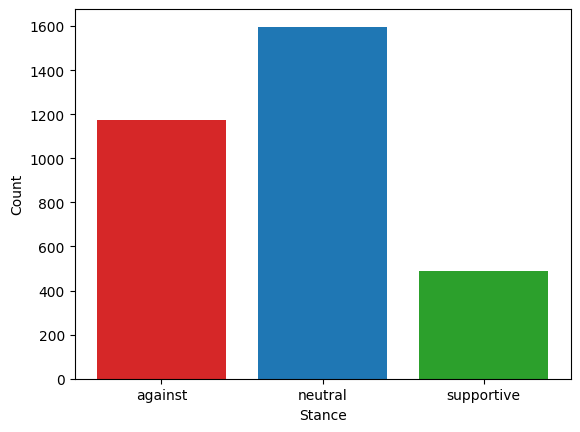

against - 1175
neutral - 1597
supportive - 489


In [5]:
# show how many sentences in each stance
value_counts = data["stance"].value_counts()
value_counts = value_counts.reindex(["against", "neutral", "supportive"])

plt.bar(value_counts.index, value_counts.values, color=["tab:red", "tab:blue", "tab:green"])

plt.xlabel("Stance")
plt.ylabel("Count")

plt.show()

for val, count in zip(value_counts.index, value_counts.values):
  print(f"{val} - {count}")

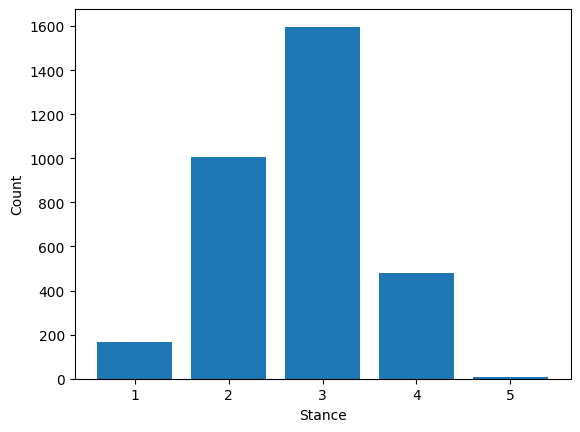

1 - 168
2 - 1007
3 - 1597
4 - 480
5 - 9


In [6]:
# show how many sentences in each stance (number)
value_counts = data["stanceConsolidated"].value_counts()
value_counts = value_counts.reindex([1, 2, 3, 4, 5])
plt.bar(value_counts.index, value_counts.values)

plt.xlabel("Stance")
plt.ylabel("Count")

plt.show()

for val, count in zip(value_counts.index, value_counts.values):
  print(f"{val} - {count}")

# 1,2 - supportive
# 3   - neutral
# 4,5 - against

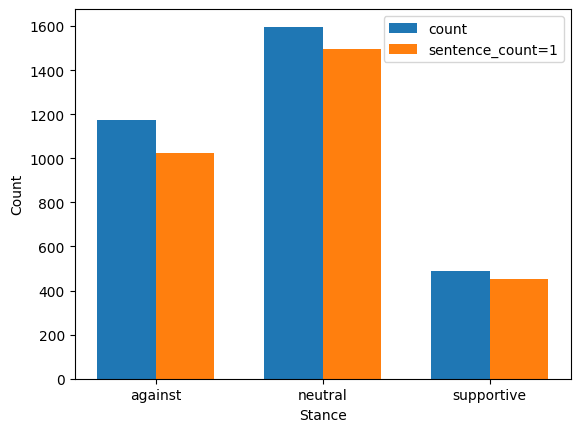

In [7]:
value_counts = data["stance"].value_counts()
value_counts = value_counts.reindex(["against", "neutral", "supportive"])

count_sentence_count = data[data["sentence_count"] == 1].groupby("stance").size()
count_sentence_count = count_sentence_count.reindex(["against", "neutral", "supportive"])

bar_width = 0.35
fig, ax = plt.subplots()

bar_positions_sentence = [pos + bar_width for pos in range(1, 4)]

ax.bar(range(1, 4), value_counts, width=bar_width, label='count')
ax.bar(bar_positions_sentence, count_sentence_count, width=bar_width, label='sentence_count=1')

ax.set_xlabel('Stance')
ax.set_ylabel('Count')
ax.set_xticks([pos + bar_width/2 for pos in range(1, 4)])
ax.set_xticklabels(["against", "neutral", "supportive"])
ax.legend()

plt.show()

#Representation

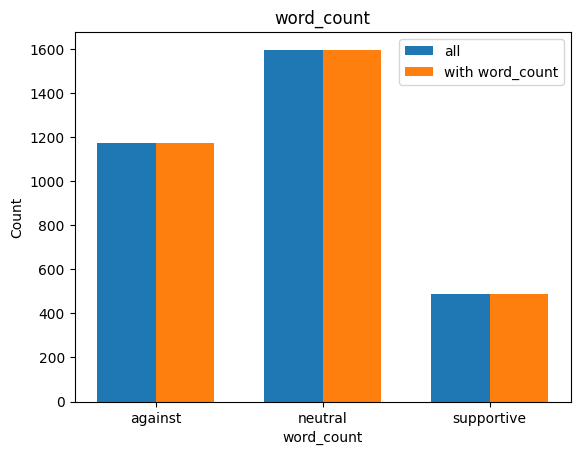

=====

total_sentences=3261 feature_sentences=3261 missing=0 || 0.0%
s_tt_counts={'against': 1175, 'neutral': 1597, 'supportive': 489}
s_ft_counts={'against': 1175, 'neutral': 1597, 'supportive': 489}

=====



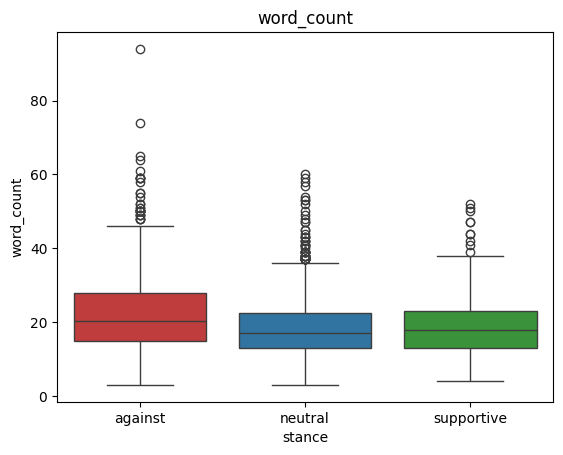

COMBINED
all
count    3261.000000
mean       19.852167
std         9.056150
min         3.000000
25%        14.000000
50%        18.000000
75%        24.000000
max        94.000000
Name: word_count, dtype: float64


word_count -- against
count    1175.000000
mean       22.324184
std        10.191832
min         3.000000
25%        15.000000
50%        20.333333
75%        28.000000
max        94.000000
Name: word_count, dtype: float64


word_count -- neutral
count    1597.000000
mean       18.308547
std         8.040881
min         3.000000
25%        13.000000
50%        17.000000
75%        22.500000
max        60.000000
Name: word_count, dtype: float64


word_count -- supportive
count    489.000000
mean      18.953476
std        7.950493
min        4.000000
25%       13.000000
50%       18.000000
75%       23.000000
max       52.000000
Name: word_count, dtype: float64


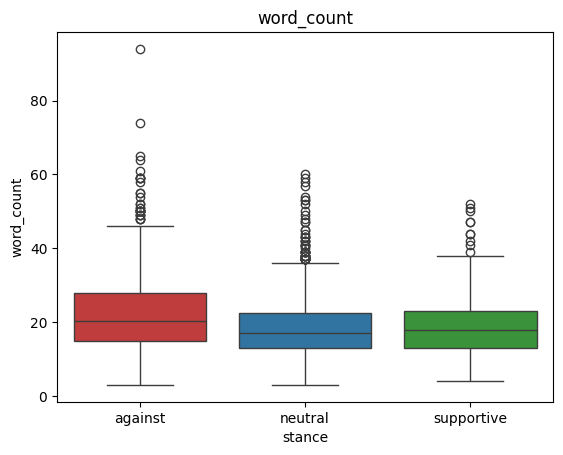

COMBINED
with feature
count    3261.000000
mean       19.852167
std         9.056150
min         3.000000
25%        14.000000
50%        18.000000
75%        24.000000
max        94.000000
Name: word_count, dtype: float64


word_count -- against
count    1175.000000
mean       22.324184
std        10.191832
min         3.000000
25%        15.000000
50%        20.333333
75%        28.000000
max        94.000000
Name: word_count, dtype: float64


word_count -- neutral
count    1597.000000
mean       18.308547
std         8.040881
min         3.000000
25%        13.000000
50%        17.000000
75%        22.500000
max        60.000000
Name: word_count, dtype: float64


word_count -- supportive
count    489.000000
mean      18.953476
std        7.950493
min        4.000000
25%       13.000000
50%       18.000000
75%       23.000000
max       52.000000
Name: word_count, dtype: float64


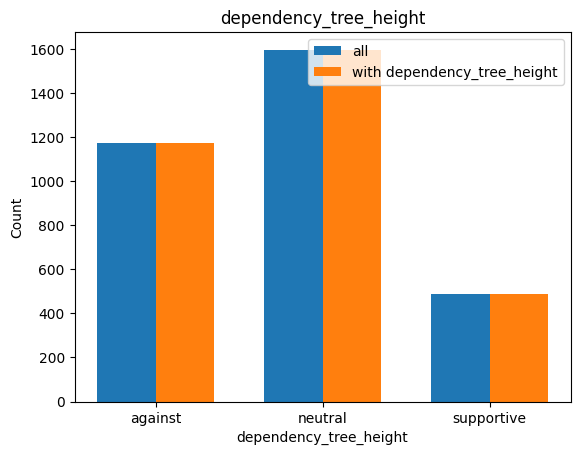

=====

total_sentences=3261 feature_sentences=3261 missing=0 || 0.0%
s_tt_counts={'against': 1175, 'neutral': 1597, 'supportive': 489}
s_ft_counts={'against': 1175, 'neutral': 1597, 'supportive': 489}

=====



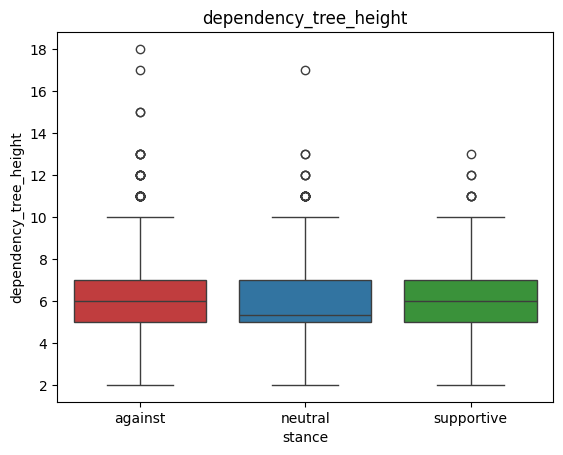

COMBINED
all
count    3261.000000
mean        5.994174
std         1.817697
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        18.000000
Name: dependency_tree_height, dtype: float64


dependency_tree_height -- against
count    1175.000000
mean        6.331418
std         1.940045
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        18.000000
Name: dependency_tree_height, dtype: float64


dependency_tree_height -- neutral
count    1597.000000
mean        5.725684
std         1.706250
min         2.000000
25%         5.000000
50%         5.333333
75%         7.000000
max        17.000000
Name: dependency_tree_height, dtype: float64


dependency_tree_height -- supportive
count    489.000000
mean       6.060668
std        1.726780
min        2.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       13.000000
Name: dependency_tree_height, dtype: float64


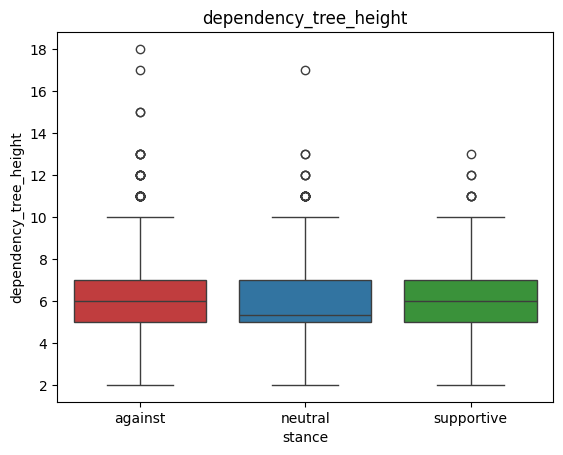

COMBINED
with feature
count    3261.000000
mean        5.994174
std         1.817697
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        18.000000
Name: dependency_tree_height, dtype: float64


dependency_tree_height -- against
count    1175.000000
mean        6.331418
std         1.940045
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        18.000000
Name: dependency_tree_height, dtype: float64


dependency_tree_height -- neutral
count    1597.000000
mean        5.725684
std         1.706250
min         2.000000
25%         5.000000
50%         5.333333
75%         7.000000
max        17.000000
Name: dependency_tree_height, dtype: float64


dependency_tree_height -- supportive
count    489.000000
mean       6.060668
std        1.726780
min        2.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       13.000000
Name: dependency_tree_height, dtype: float64


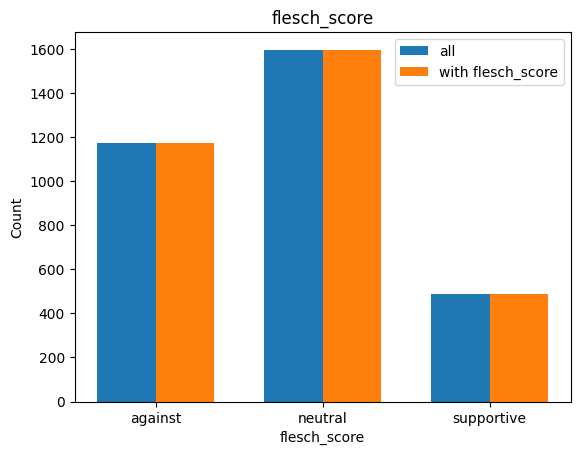

=====

total_sentences=3261 feature_sentences=3261 missing=0 || 0.0%
s_tt_counts={'against': 1175, 'neutral': 1597, 'supportive': 489}
s_ft_counts={'against': 1175, 'neutral': 1597, 'supportive': 489}

=====



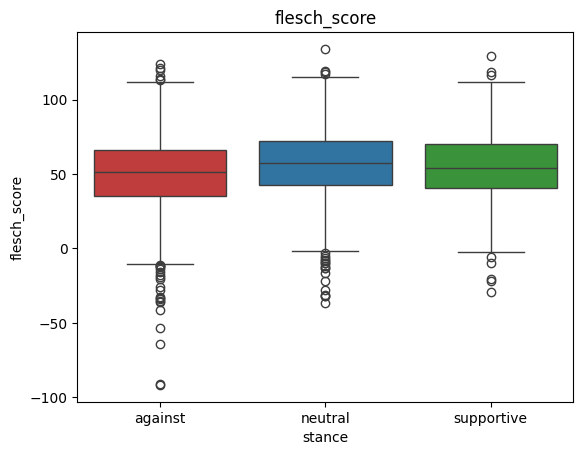

COMBINED
all
count    3261.000000
mean       53.798974
std        24.003137
min       -91.728227
25%        39.490000
50%        54.955676
75%        69.793000
max       134.118421
Name: flesch_score, dtype: float64


flesch_score -- against
count    1175.000000
mean       49.461711
std        25.370926
min       -91.728227
25%        35.289658
50%        51.130000
75%        66.298409
max       123.930000
Name: flesch_score, dtype: float64


flesch_score -- neutral
count    1597.000000
mean       56.756753
std        22.743296
min       -36.519709
25%        42.726000
50%        57.495000
75%        72.379310
max       134.118421
Name: flesch_score, dtype: float64


flesch_score -- supportive
count    489.000000
mean      54.561163
std       23.111625
min      -29.212857
25%       40.528509
50%       53.759545
75%       70.302927
max      129.570000
Name: flesch_score, dtype: float64


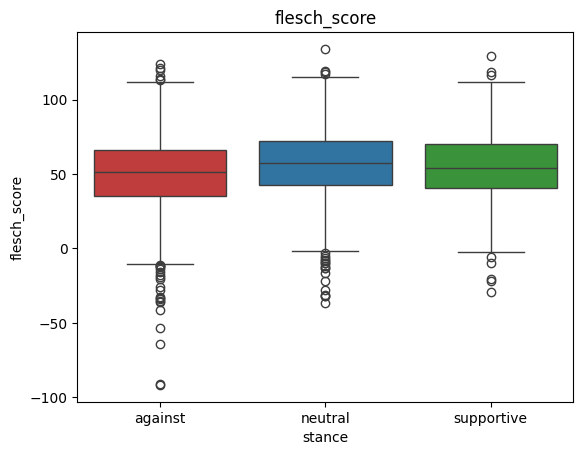

COMBINED
with feature
count    3261.000000
mean       53.798974
std        24.003137
min       -91.728227
25%        39.490000
50%        54.955676
75%        69.793000
max       134.118421
Name: flesch_score, dtype: float64


flesch_score -- against
count    1175.000000
mean       49.461711
std        25.370926
min       -91.728227
25%        35.289658
50%        51.130000
75%        66.298409
max       123.930000
Name: flesch_score, dtype: float64


flesch_score -- neutral
count    1597.000000
mean       56.756753
std        22.743296
min       -36.519709
25%        42.726000
50%        57.495000
75%        72.379310
max       134.118421
Name: flesch_score, dtype: float64


flesch_score -- supportive
count    489.000000
mean      54.561163
std       23.111625
min      -29.212857
25%       40.528509
50%       53.759545
75%       70.302927
max      129.570000
Name: flesch_score, dtype: float64


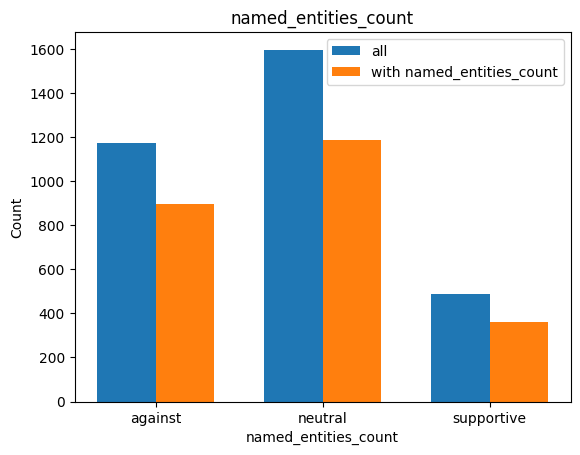

=====

total_sentences=3261 feature_sentences=2441 missing=820 || 25.15%
s_tt_counts={'against': 1175, 'neutral': 1597, 'supportive': 489}
s_ft_counts={'against': 897, 'neutral': 1185, 'supportive': 359}

=====



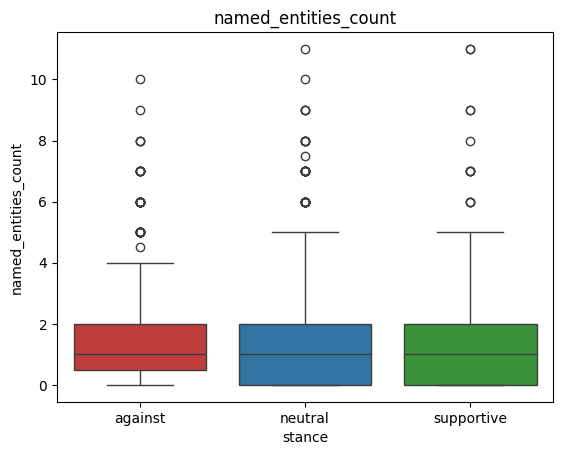

COMBINED
all
count    3261.000000
mean        1.569457
std         1.527895
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: named_entities_count, dtype: float64


named_entities_count -- against
count    1175.000000
mean        1.536383
std         1.439578
min         0.000000
25%         0.500000
50%         1.000000
75%         2.000000
max        10.000000
Name: named_entities_count, dtype: float64


named_entities_count -- neutral
count    1597.000000
mean        1.600657
std         1.568594
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: named_entities_count, dtype: float64


named_entities_count -- supportive
count    489.000000
mean       1.547035
std        1.598763
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: named_entities_count, dtype: float64


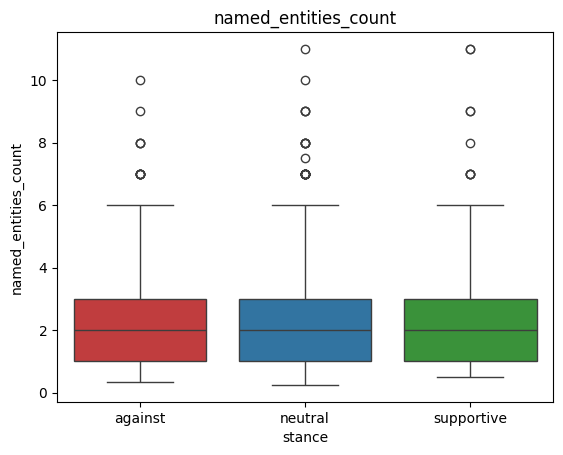

COMBINED
with feature
count    2441.000000
mean        2.096682
std         1.418845
min         0.250000
25%         1.000000
50%         2.000000
75%         3.000000
max        11.000000
Name: named_entities_count, dtype: float64


named_entities_count -- against
count    897.000000
mean       2.012542
std        1.325149
min        0.333333
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: named_entities_count, dtype: float64


named_entities_count -- neutral
count    1185.000000
mean        2.157173
std         1.454358
min         0.250000
25%         1.000000
50%         2.000000
75%         3.000000
max        11.000000
Name: named_entities_count, dtype: float64


named_entities_count -- supportive
count    359.000000
mean       2.107242
std        1.516715
min        0.500000
25%        1.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: named_entities_count, dtype: float64


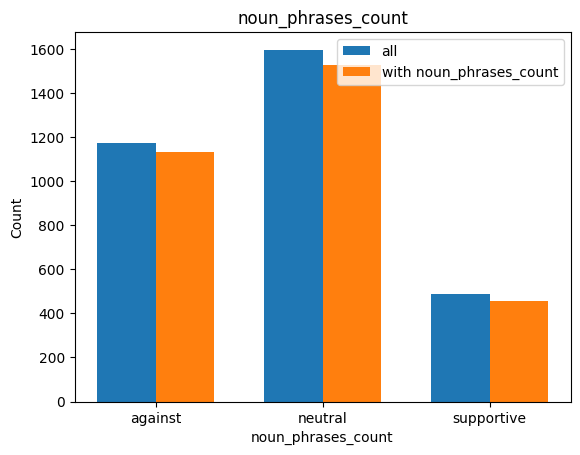

=====

total_sentences=3261 feature_sentences=3117 missing=144 || 4.42%
s_tt_counts={'against': 1175, 'neutral': 1597, 'supportive': 489}
s_ft_counts={'against': 1132, 'neutral': 1529, 'supportive': 456}

=====



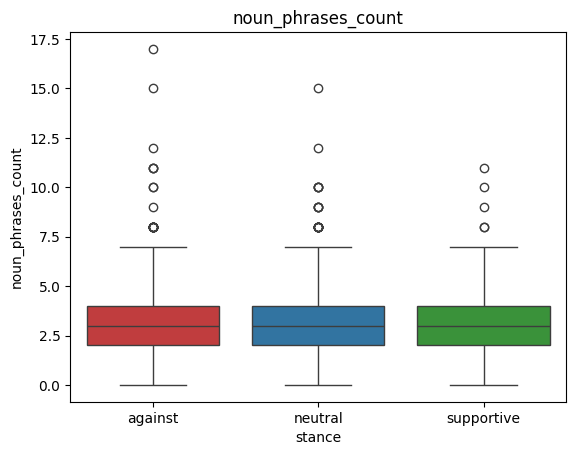

COMBINED
all
count    3261.000000
mean        2.928728
std         1.764834
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        17.000000
Name: noun_phrases_count, dtype: float64


noun_phrases_count -- against
count    1175.000000
mean        3.113050
std         1.872415
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        17.000000
Name: noun_phrases_count, dtype: float64


noun_phrases_count -- neutral
count    1597.000000
mean        2.825089
std         1.695827
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        15.000000
Name: noun_phrases_count, dtype: float64


noun_phrases_count -- supportive
count    489.000000
mean       2.824301
std        1.684988
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       11.000000
Name: noun_phrases_count, dtype: float64


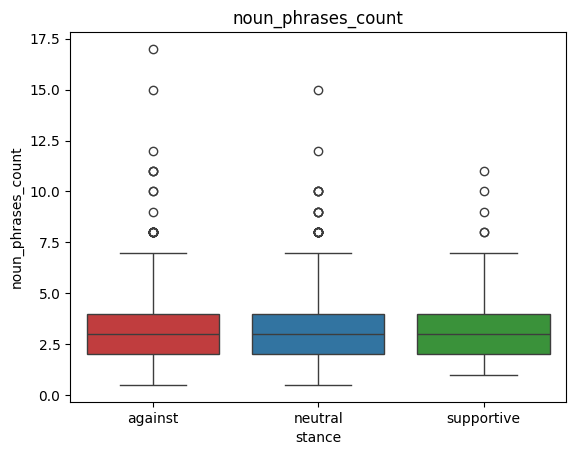

COMBINED
with feature
count    3117.000000
mean        3.064031
std         1.686378
min         0.500000
25%         2.000000
50%         3.000000
75%         4.000000
max        17.000000
Name: noun_phrases_count, dtype: float64


noun_phrases_count -- against
count    1132.000000
mean        3.231302
std         1.804656
min         0.500000
25%         2.000000
50%         3.000000
75%         4.000000
max        17.000000
Name: noun_phrases_count, dtype: float64


noun_phrases_count -- neutral
count    1529.000000
mean        2.950730
std         1.622601
min         0.500000
25%         2.000000
50%         3.000000
75%         4.000000
max        15.000000
Name: noun_phrases_count, dtype: float64


noun_phrases_count -- supportive
count    456.000000
mean       3.028692
std        1.557148
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       11.000000
Name: noun_phrases_count, dtype: float64


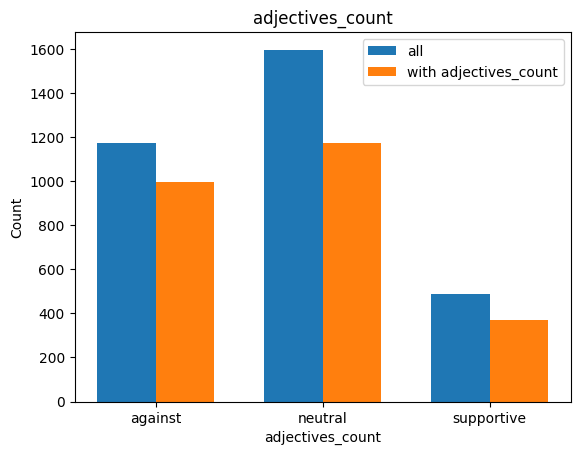

=====

total_sentences=3261 feature_sentences=2536 missing=725 || 22.23%
s_tt_counts={'against': 1175, 'neutral': 1597, 'supportive': 489}
s_ft_counts={'against': 997, 'neutral': 1171, 'supportive': 368}

=====



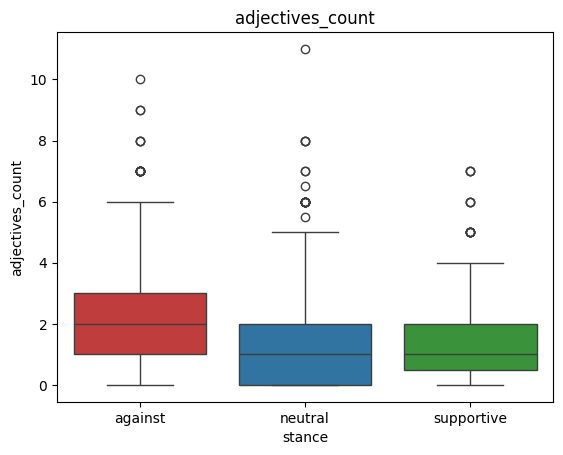

COMBINED
all
count    3261.000000
mean        1.608249
std         1.446374
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: adjectives_count, dtype: float64


adjectives_count -- against
count    1175.000000
mean        1.944752
std         1.568761
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: adjectives_count, dtype: float64


adjectives_count -- neutral
count    1597.000000
mean        1.397881
std         1.339017
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: adjectives_count, dtype: float64


adjectives_count -- supportive
count    489.000000
mean       1.486708
std        1.326097
min        0.000000
25%        0.500000
50%        1.000000
75%        2.000000
max        7.000000
Name: adjectives_count, dtype: float64


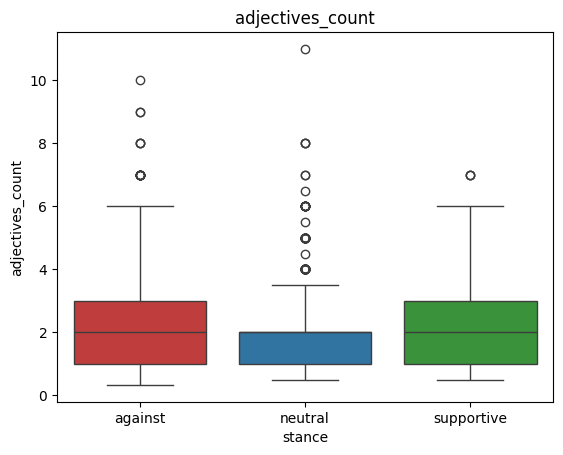

COMBINED
with feature
count    2536.000000
mean        2.068021
std         1.318753
min         0.333333
25%         1.000000
50%         2.000000
75%         3.000000
max        11.000000
Name: adjectives_count, dtype: float64


adjectives_count -- against
count    997.000000
mean       2.291959
std        1.450602
min        0.333333
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: adjectives_count, dtype: float64


adjectives_count -- neutral
count    1171.000000
mean        1.906419
std         1.214692
min         0.500000
25%         1.000000
50%         2.000000
75%         2.000000
max        11.000000
Name: adjectives_count, dtype: float64


adjectives_count -- supportive
count    368.000000
mean       1.975543
std        1.170458
min        0.500000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: adjectives_count, dtype: float64


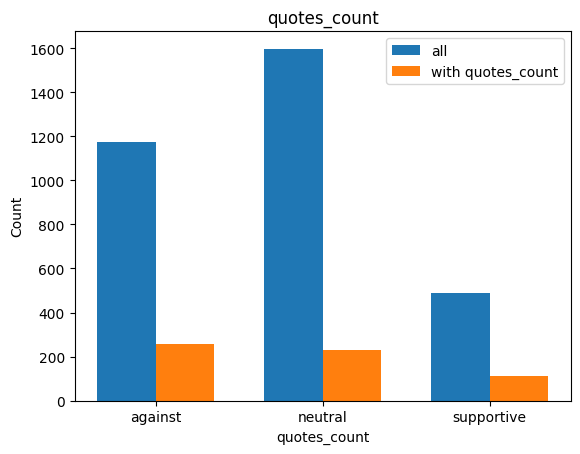

=====

total_sentences=3261 feature_sentences=601 missing=2660 || 81.57%
s_tt_counts={'against': 1175, 'neutral': 1597, 'supportive': 489}
s_ft_counts={'against': 258, 'neutral': 230, 'supportive': 113}

=====



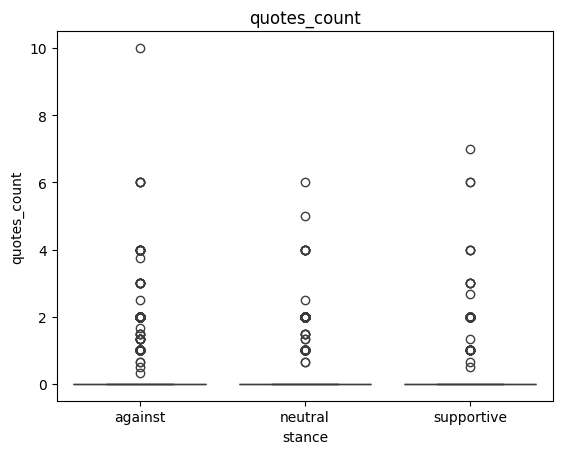

COMBINED
all
count    3261.000000
mean        0.342661
std         0.818675
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.000000
Name: quotes_count, dtype: float64


quotes_count -- against
count    1175.000000
mean        0.404043
std         0.905098
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.000000
Name: quotes_count, dtype: float64


quotes_count -- neutral
count    1597.00000
mean        0.26268
std         0.69120
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         6.00000
Name: quotes_count, dtype: float64


quotes_count -- supportive
count    489.000000
mean       0.456374
std        0.949262
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        7.000000
Name: quotes_count, dtype: float64


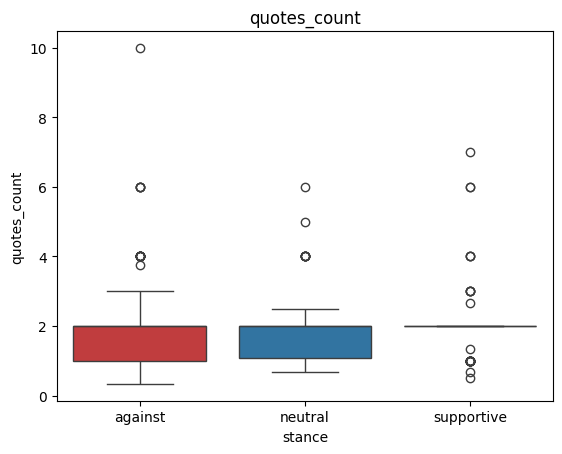

COMBINED
with feature
count    601.000000
mean       1.859262
std        0.903945
min        0.333333
25%        1.000000
50%        2.000000
75%        2.000000
max       10.000000
Name: quotes_count, dtype: float64


quotes_count -- against
count    258.000000
mean       1.840116
std        1.043727
min        0.333333
25%        1.000000
50%        2.000000
75%        2.000000
max       10.000000
Name: quotes_count, dtype: float64


quotes_count -- neutral
count    230.000000
mean       1.823913
std        0.685352
min        0.666667
25%        1.083333
50%        2.000000
75%        2.000000
max        6.000000
Name: quotes_count, dtype: float64


quotes_count -- supportive
count    113.000000
mean       1.974926
std        0.948898
min        0.500000
25%        2.000000
50%        2.000000
75%        2.000000
max        7.000000
Name: quotes_count, dtype: float64


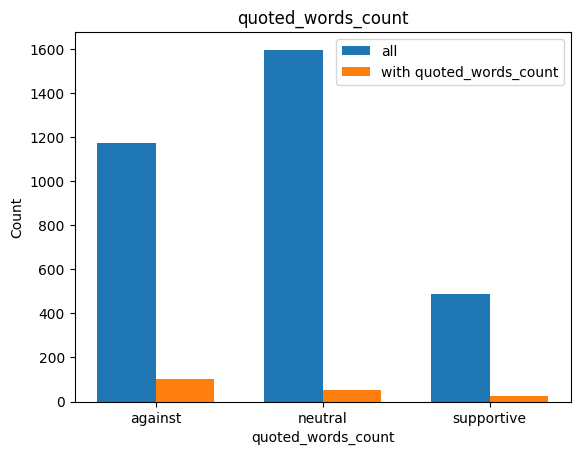

=====

total_sentences=3261 feature_sentences=184 missing=3077 || 94.36%
s_tt_counts={'against': 1175, 'neutral': 1597, 'supportive': 489}
s_ft_counts={'against': 104, 'neutral': 53, 'supportive': 27}

=====



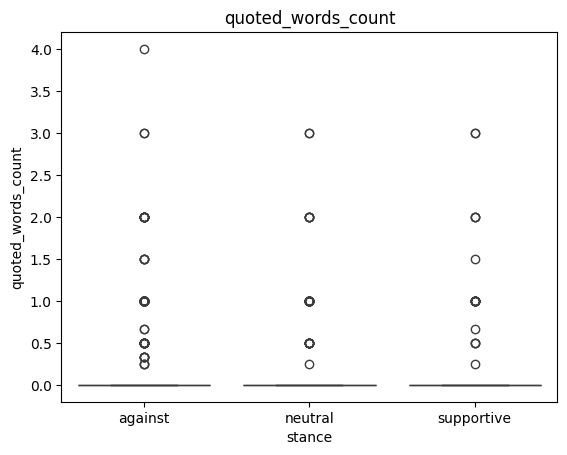

COMBINED
all
count    3261.000000
mean        0.060385
std         0.284740
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: quoted_words_count, dtype: float64


quoted_words_count -- against
count    1175.000000
mean        0.092553
std         0.346640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: quoted_words_count, dtype: float64


quoted_words_count -- neutral
count    1597.000000
mean        0.035222
std         0.214717
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: quoted_words_count, dtype: float64


quoted_words_count -- supportive
count    489.000000
mean       0.065269
std        0.311737
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: quoted_words_count, dtype: float64


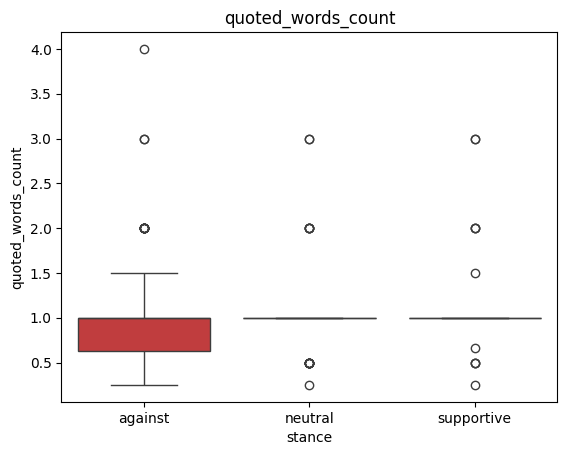

COMBINED
with feature
count    184.000000
mean       1.070199
std        0.598090
min        0.250000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: quoted_words_count, dtype: float64


quoted_words_count -- against
count    104.000000
mean       1.045673
std        0.602704
min        0.250000
25%        0.625000
50%        1.000000
75%        1.000000
max        4.000000
Name: quoted_words_count, dtype: float64


quoted_words_count -- neutral
count    53.000000
mean      1.061321
std       0.552324
min       0.250000
25%       1.000000
50%       1.000000
75%       1.000000
max       3.000000
Name: quoted_words_count, dtype: float64


quoted_words_count -- supportive
count    27.000000
mean      1.182099
std       0.673061
min       0.250000
25%       1.000000
50%       1.000000
75%       1.000000
max       3.000000
Name: quoted_words_count, dtype: float64


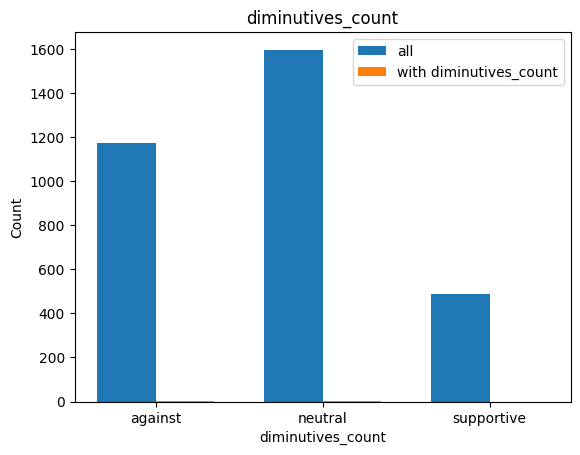

=====

total_sentences=3261 feature_sentences=5 missing=3256 || 99.85%
s_tt_counts={'against': 1175, 'neutral': 1597, 'supportive': 489}
s_ft_counts={'against': 3, 'neutral': 2, 'supportive': 0}

=====



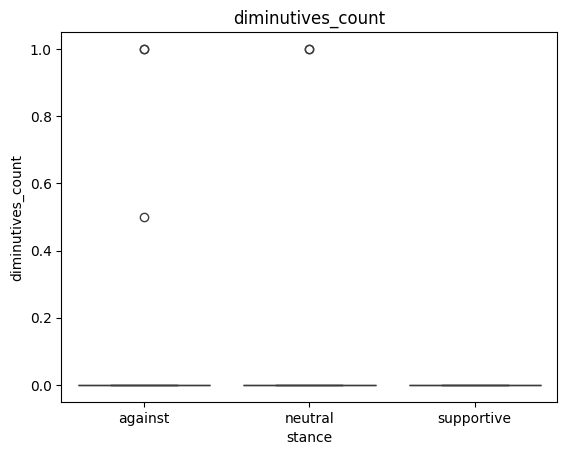

COMBINED
all
count    3261.00000
mean        0.00138
std         0.03608
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: diminutives_count, dtype: float64


diminutives_count -- against
count    1175.000000
mean        0.002128
std         0.043726
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: diminutives_count, dtype: float64


diminutives_count -- neutral
count    1597.000000
mean        0.001252
std         0.035377
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: diminutives_count, dtype: float64


diminutives_count -- supportive
count    489.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: diminutives_count, dtype: float64


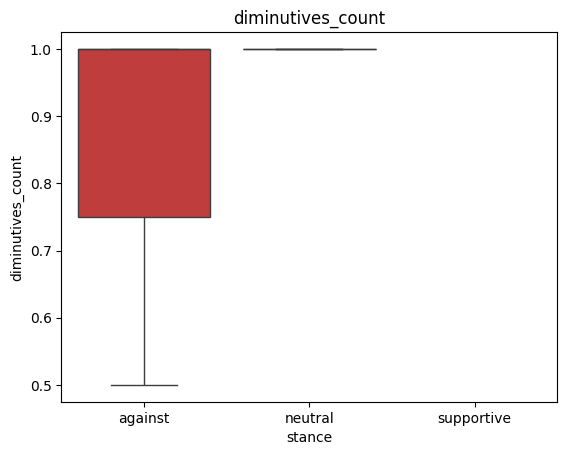

COMBINED
with feature
count    5.000000
mean     0.900000
std      0.223607
min      0.500000
25%      1.000000
50%      1.000000
75%      1.000000
max      1.000000
Name: diminutives_count, dtype: float64


diminutives_count -- against
count    3.000000
mean     0.833333
std      0.288675
min      0.500000
25%      0.750000
50%      1.000000
75%      1.000000
max      1.000000
Name: diminutives_count, dtype: float64


diminutives_count -- neutral
count    2.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: diminutives_count, dtype: float64


diminutives_count -- supportive
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: diminutives_count, dtype: float64


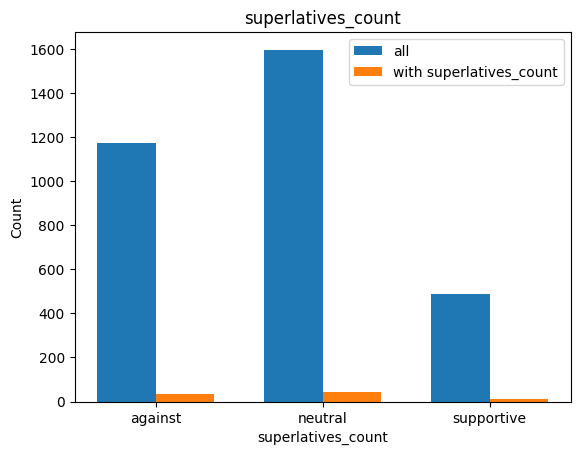

=====

total_sentences=3261 feature_sentences=87 missing=3174 || 97.33%
s_tt_counts={'against': 1175, 'neutral': 1597, 'supportive': 489}
s_ft_counts={'against': 34, 'neutral': 42, 'supportive': 11}

=====



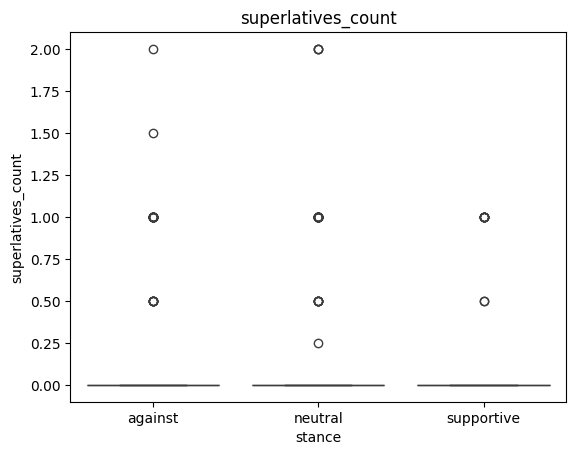

COMBINED
all
count    3261.000000
mean        0.025529
std         0.162361
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: superlatives_count, dtype: float64


superlatives_count -- against
count    1175.000000
mean        0.027234
std         0.165429
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: superlatives_count, dtype: float64


superlatives_count -- neutral
count    1597.000000
mean        0.025830
std         0.166974
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: superlatives_count, dtype: float64


superlatives_count -- supportive
count    489.000000
mean       0.020450
std        0.138015
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: superlatives_count, dtype: float64


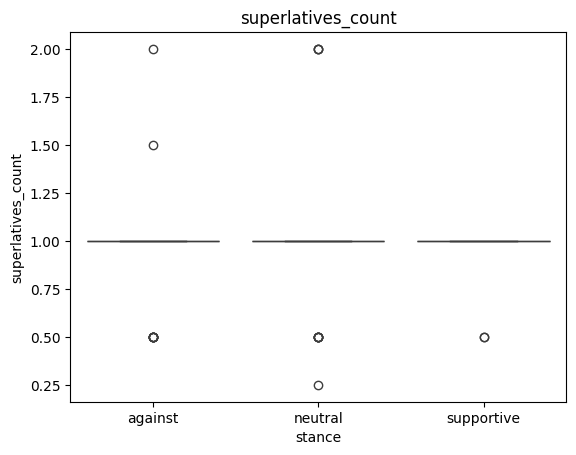

COMBINED
with feature
count    87.000000
mean      0.956897
std       0.312545
min       0.250000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: superlatives_count, dtype: float64


superlatives_count -- against
count    34.000000
mean      0.941176
std       0.295540
min       0.500000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: superlatives_count, dtype: float64


superlatives_count -- neutral
count    42.000000
mean      0.982143
std       0.350926
min       0.250000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: superlatives_count, dtype: float64


superlatives_count -- supportive
count    11.000000
mean      0.909091
std       0.202260
min       0.500000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: superlatives_count, dtype: float64


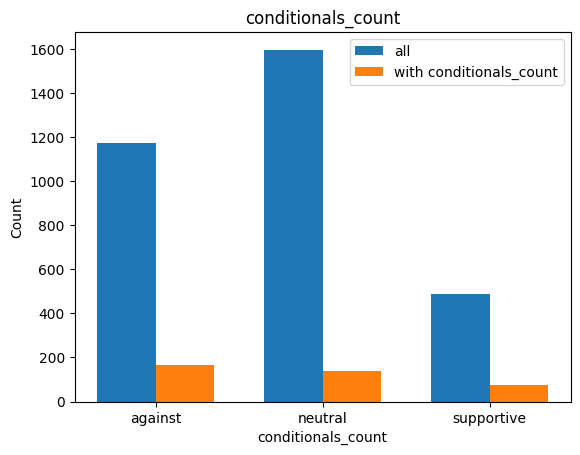

=====

total_sentences=3261 feature_sentences=380 missing=2881 || 88.35%
s_tt_counts={'against': 1175, 'neutral': 1597, 'supportive': 489}
s_ft_counts={'against': 167, 'neutral': 140, 'supportive': 73}

=====



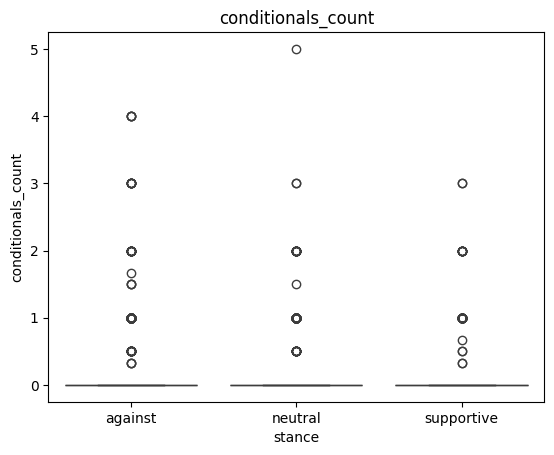

COMBINED
all
count    3261.000000
mean        0.136461
std         0.431168
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: conditionals_count, dtype: float64


conditionals_count -- against
count    1175.000000
mean        0.170780
std         0.498585
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: conditionals_count, dtype: float64


conditionals_count -- neutral
count    1597.000000
mean        0.100814
std         0.364692
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: conditionals_count, dtype: float64


conditionals_count -- supportive
count    489.000000
mean       0.170416
std        0.448050
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: conditionals_count, dtype: float64


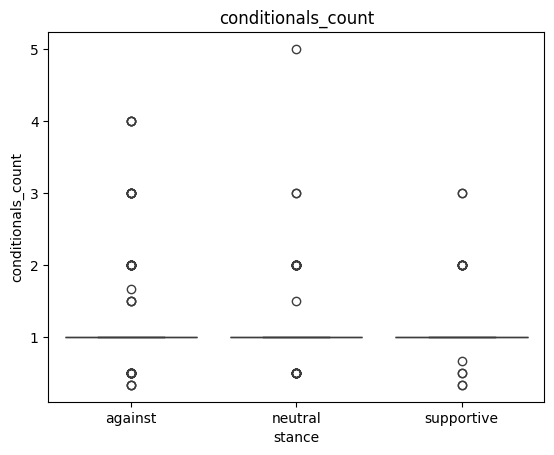

COMBINED
with feature
count    380.000000
mean       1.171053
std        0.619940
min        0.333333
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: conditionals_count, dtype: float64


conditionals_count -- against
count    167.000000
mean       1.201597
std        0.715536
min        0.333333
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: conditionals_count, dtype: float64


conditionals_count -- neutral
count    140.000000
mean       1.150000
std        0.558454
min        0.500000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: conditionals_count, dtype: float64


conditionals_count -- supportive
count    73.000000
mean      1.141553
std       0.486445
min       0.333333
25%       1.000000
50%       1.000000
75%       1.000000
max       3.000000
Name: conditionals_count, dtype: float64


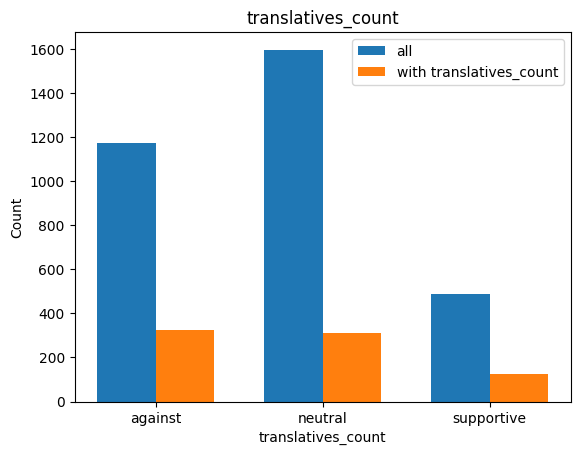

=====

total_sentences=3261 feature_sentences=763 missing=2498 || 76.6%
s_tt_counts={'against': 1175, 'neutral': 1597, 'supportive': 489}
s_ft_counts={'against': 326, 'neutral': 310, 'supportive': 127}

=====



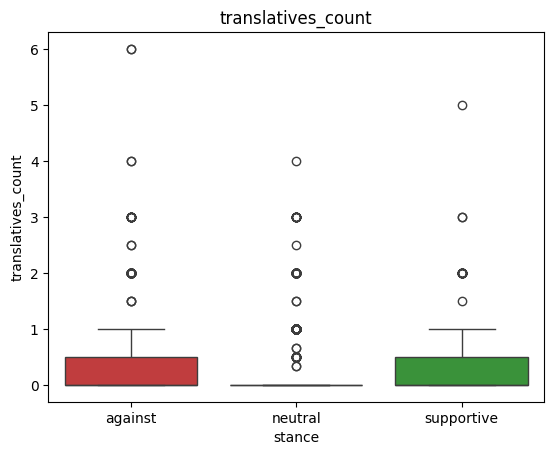

COMBINED
all
count    3261.000000
mean        0.292242
std         0.618256
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: translatives_count, dtype: float64


translatives_count -- against
count    1175.000000
mean        0.352766
std         0.690328
min         0.000000
25%         0.000000
50%         0.000000
75%         0.500000
max         6.000000
Name: translatives_count, dtype: float64


translatives_count -- neutral
count    1597.000000
mean        0.240138
std         0.555091
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: translatives_count, dtype: float64


translatives_count -- supportive
count    489.000000
mean       0.316973
std        0.617246
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max        5.000000
Name: translatives_count, dtype: float64


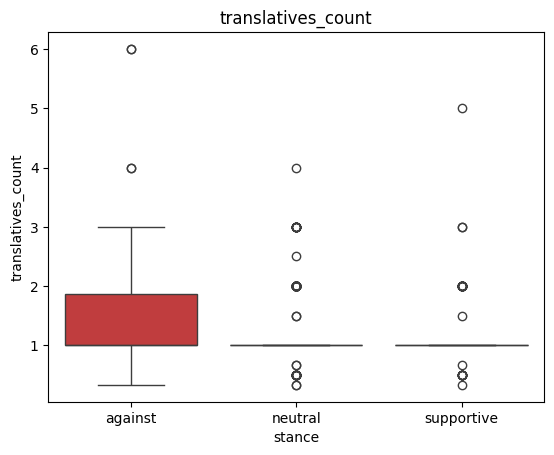

COMBINED
with feature
count    763.000000
mean       1.249017
std        0.662353
min        0.333333
25%        1.000000
50%        1.000000
75%        1.000000
max        6.000000
Name: translatives_count, dtype: float64


translatives_count -- against
count    326.000000
mean       1.271472
std        0.741452
min        0.333333
25%        1.000000
50%        1.000000
75%        1.875000
max        6.000000
Name: translatives_count, dtype: float64


translatives_count -- neutral
count    310.000000
mean       1.237097
std        0.595111
min        0.333333
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: translatives_count, dtype: float64


translatives_count -- supportive
count    127.000000
mean       1.220472
std        0.603445
min        0.333333
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: translatives_count, dtype: float64


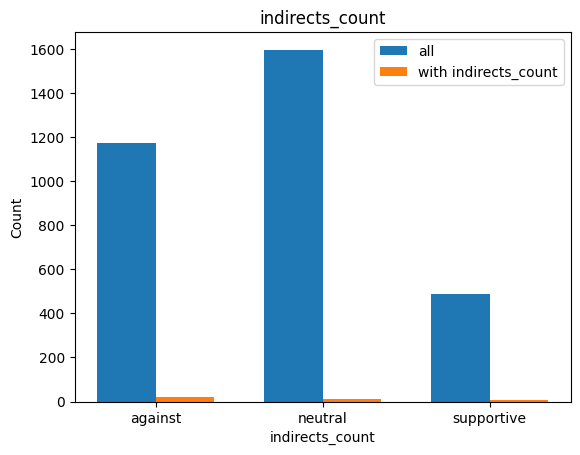

=====

total_sentences=3261 feature_sentences=38 missing=3223 || 98.83%
s_tt_counts={'against': 1175, 'neutral': 1597, 'supportive': 489}
s_ft_counts={'against': 22, 'neutral': 11, 'supportive': 5}

=====



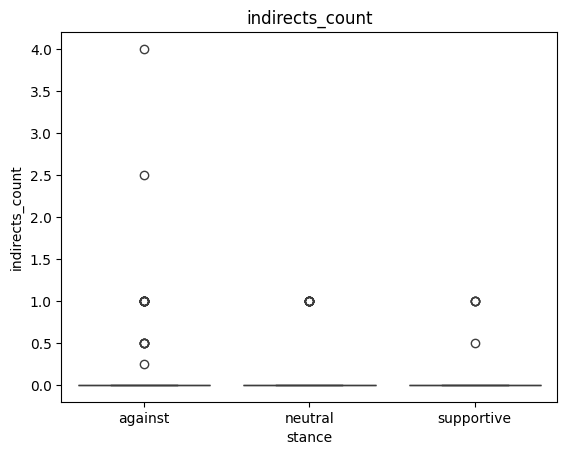

COMBINED
all
count    3261.000000
mean        0.011883
std         0.126724
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: indirects_count, dtype: float64


indirects_count -- against
count    1175.000000
mean        0.019787
std         0.177774
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: indirects_count, dtype: float64


indirects_count -- neutral
count    1597.000000
mean        0.006888
std         0.082733
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: indirects_count, dtype: float64


indirects_count -- supportive
count    489.000000
mean       0.009202
std        0.092866
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: indirects_count, dtype: float64


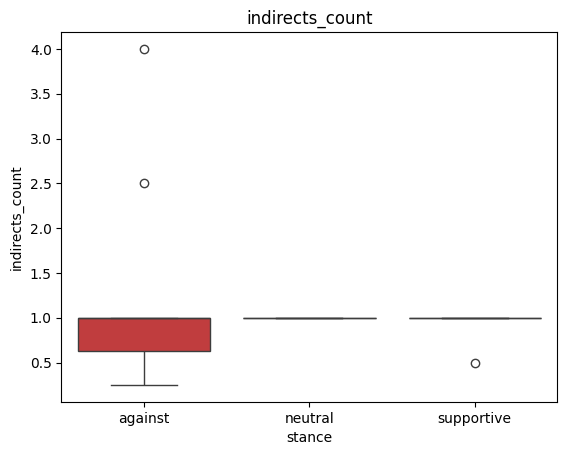

COMBINED
with feature
count    38.000000
mean      1.019737
std       0.599497
min       0.250000
25%       1.000000
50%       1.000000
75%       1.000000
max       4.000000
Name: indirects_count, dtype: float64


indirects_count -- against
count    22.000000
mean      1.056818
std       0.786538
min       0.250000
25%       0.625000
50%       1.000000
75%       1.000000
max       4.000000
Name: indirects_count, dtype: float64


indirects_count -- neutral
count    11.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: indirects_count, dtype: float64


indirects_count -- supportive
count    5.000000
mean     0.900000
std      0.223607
min      0.500000
25%      1.000000
50%      1.000000
75%      1.000000
max      1.000000
Name: indirects_count, dtype: float64


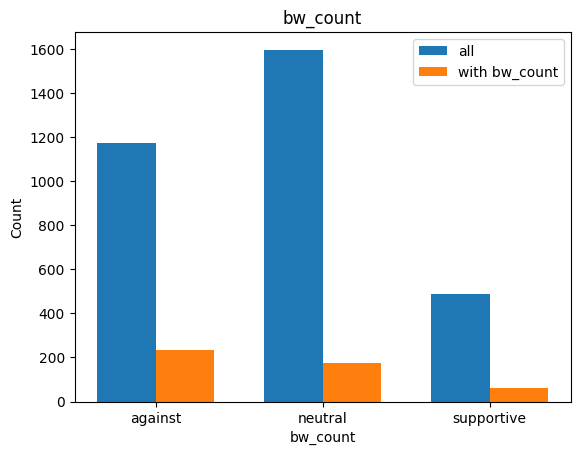

=====

total_sentences=3261 feature_sentences=470 missing=2791 || 85.59%
s_tt_counts={'against': 1175, 'neutral': 1597, 'supportive': 489}
s_ft_counts={'against': 233, 'neutral': 175, 'supportive': 62}

=====



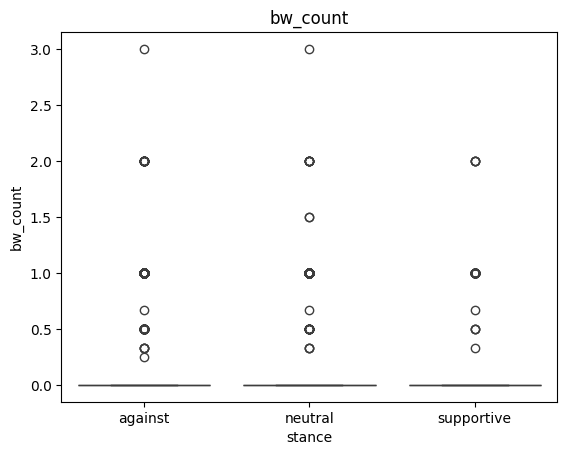

COMBINED
all
count    3261.000000
mean        0.143335
std         0.375858
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: bw_count, dtype: float64


bw_count -- against
count    1175.000000
mean        0.195532
std         0.433163
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: bw_count, dtype: float64


bw_count -- neutral
count    1597.000000
mean        0.109059
std         0.329267
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: bw_count, dtype: float64


bw_count -- supportive
count    489.000000
mean       0.129857
std        0.356611
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: bw_count, dtype: float64


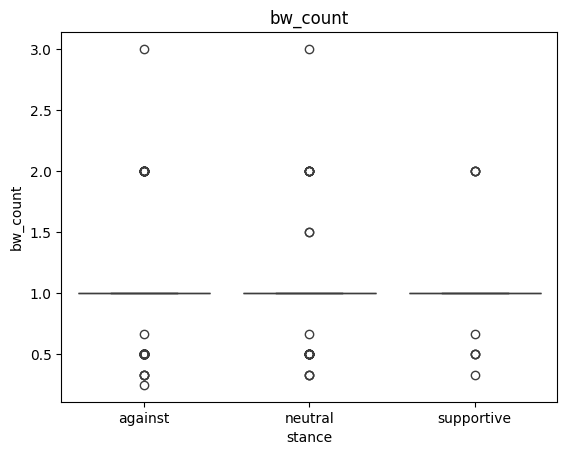

COMBINED
with feature
count    470.000000
mean       0.994504
std        0.365597
min        0.250000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: bw_count, dtype: float64


bw_count -- against
count    233.000000
mean       0.986052
std        0.408192
min        0.250000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: bw_count, dtype: float64


bw_count -- neutral
count    175.000000
mean       0.995238
std        0.327745
min        0.333333
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: bw_count, dtype: float64


bw_count -- supportive
count    62.000000
mean      1.024194
std       0.293907
min       0.333333
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: bw_count, dtype: float64


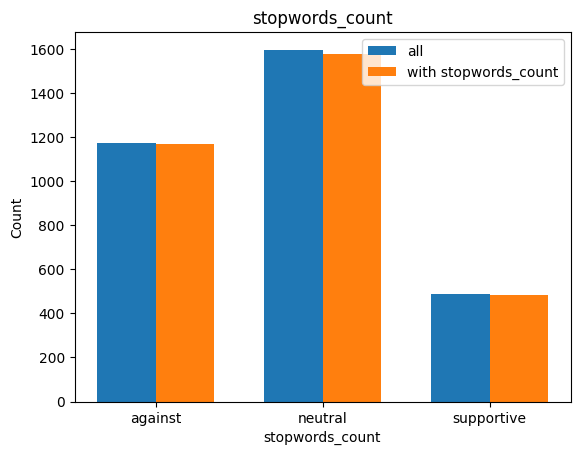

=====

total_sentences=3261 feature_sentences=3229 missing=32 || 0.98%
s_tt_counts={'against': 1175, 'neutral': 1597, 'supportive': 489}
s_ft_counts={'against': 1169, 'neutral': 1578, 'supportive': 482}

=====



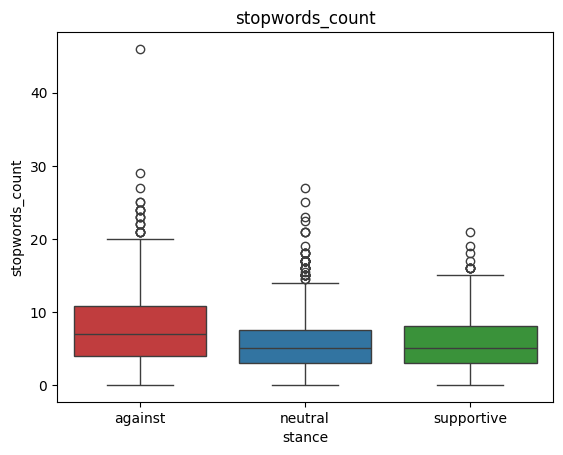

COMBINED
all
count    3261.000000
mean        6.510937
std         4.222437
min         0.000000
25%         3.500000
50%         6.000000
75%         8.666667
max        46.000000
Name: stopwords_count, dtype: float64


stopwords_count -- against
count    1175.000000
mean        7.880496
std         4.842857
min         0.000000
25%         4.000000
50%         7.000000
75%        10.750000
max        46.000000
Name: stopwords_count, dtype: float64


stopwords_count -- neutral
count    1597.00000
mean        5.68660
std         3.60461
min         0.00000
25%         3.00000
50%         5.00000
75%         7.50000
max        27.00000
Name: stopwords_count, dtype: float64


stopwords_count -- supportive
count    489.000000
mean       5.912236
std        3.617669
min        0.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       21.000000
Name: stopwords_count, dtype: float64


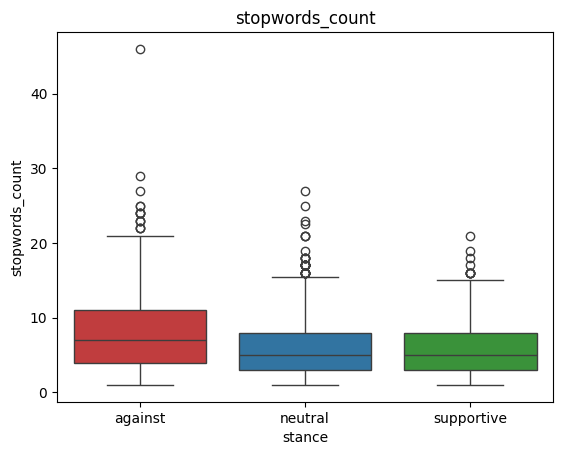

COMBINED
with feature
count    3229.000000
mean        6.575462
std         4.193006
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        46.000000
Name: stopwords_count, dtype: float64


stopwords_count -- against
count    1169.000000
mean        7.920944
std         4.822145
min         1.000000
25%         4.000000
50%         7.000000
75%        11.000000
max        46.000000
Name: stopwords_count, dtype: float64


stopwords_count -- neutral
count    1578.000000
mean        5.755070
std         3.571479
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        27.000000
Name: stopwords_count, dtype: float64


stopwords_count -- supportive
count    482.000000
mean       5.998098
std        3.572381
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       21.000000
Name: stopwords_count, dtype: float64


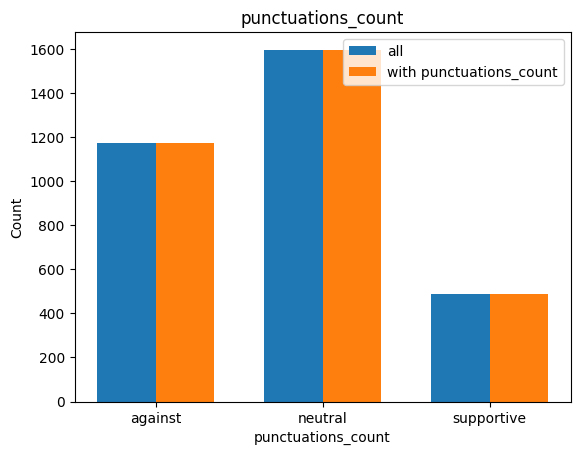

=====

total_sentences=3261 feature_sentences=3259 missing=2 || 0.06%
s_tt_counts={'against': 1175, 'neutral': 1597, 'supportive': 489}
s_ft_counts={'against': 1175, 'neutral': 1596, 'supportive': 488}

=====



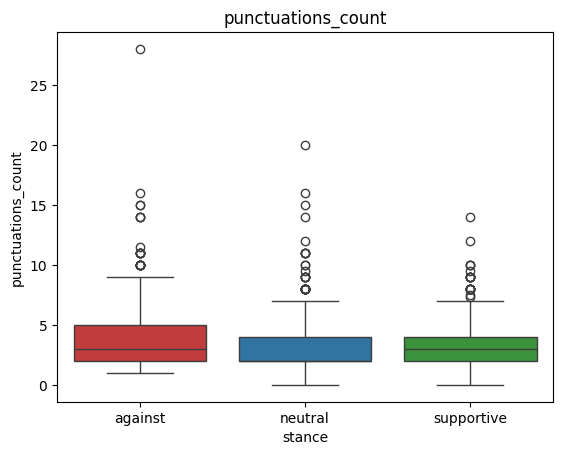

COMBINED
all
count    3261.000000
mean        3.246039
std         2.099126
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        28.000000
Name: punctuations_count, dtype: float64


punctuations_count -- against
count    1175.000000
mean        3.722553
std         2.335089
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        28.000000
Name: punctuations_count, dtype: float64


punctuations_count -- neutral
count    1597.000000
mean        2.915675
std         1.859925
min         0.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        20.000000
Name: punctuations_count, dtype: float64


punctuations_count -- supportive
count    489.000000
mean       3.179959
std        2.023898
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       14.000000
Name: punctuations_count, dtype: float64


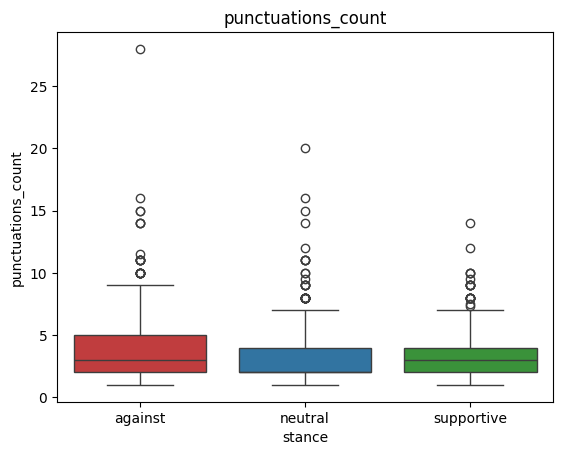

COMBINED
with feature
count    3259.000000
mean        3.248031
std         2.098229
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        28.000000
Name: punctuations_count, dtype: float64


punctuations_count -- against
count    1175.000000
mean        3.722553
std         2.335089
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        28.000000
Name: punctuations_count, dtype: float64


punctuations_count -- neutral
count    1596.000000
mean        2.917502
std         1.859074
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        20.000000
Name: punctuations_count, dtype: float64


punctuations_count -- supportive
count    488.000000
mean       3.186475
std        2.020833
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       14.000000
Name: punctuations_count, dtype: float64


In [8]:
stances = ["against", "neutral", "supportive"]
palette = {"against":"tab:red", "neutral":"tab:blue", "supportive":"tab:green"}

features = ['word_count', "dependency_tree_height", 'flesch_score', 'named_entities_count', 'noun_phrases_count',
            'adjectives_count', 'quotes_count', 'quoted_words_count', "diminutives_count", 'superlatives_count',
            'conditionals_count', 'translatives_count', 'indirects_count', 'bw_count',
            'stopwords_count', 'punctuations_count']

for feature in features:

  modified_data = data[data[feature] != 0]

  tt_counts = dict(data["stance"].value_counts()) # total counts
  ft_counts = dict(modified_data["stance"].value_counts()) # feature counts

  for st in stances:
    if st not in tt_counts:
      tt_counts.update({st: 0})
    if st not in ft_counts:
      ft_counts.update({st: 0})

  s_tt_counts = dict(sorted(tt_counts.items()))
  s_ft_counts = dict(sorted(ft_counts.items()))

  bar_width = 0.35
  index = np.arange(1, 4)

  # bar chart
  plt.bar(index, s_tt_counts.values(), bar_width, label='all')
  plt.bar([i + bar_width for i in index], s_ft_counts.values(), bar_width, label=f'with {feature}')
  plt.xlabel(f'{feature}')
  plt.ylabel('Count')
  plt.title(f'{feature}')
  plt.xticks([i + bar_width / 2 for i in index], stances)
  plt.legend()
  plt.show()
  #

  print("=====\n")
  total_sentences = len(data)
  feature_sentences = len(modified_data)
  missing = total_sentences - feature_sentences
  percentage = round((missing / total_sentences)*100, 2)
  print(f"{total_sentences=} {feature_sentences=} {missing=} || {percentage}%")
  print(f"{s_tt_counts=}")
  print(f"{s_ft_counts=}\n")
  print("=====\n")

  for i, d in enumerate([data, modified_data]):

    ax = sns.boxplot(data=d, x='stance', hue='stance', legend=False, y=f"{feature}", order=["against", "neutral", "supportive"], palette=palette)
    plt.title(f'{feature}')
    plt.show()

    print("COMBINED")
    print("all" if i == 0 else "with feature")
    print(d[feature].describe())

    for st in stances:
      print("\n")
      print(f"{feature} -- {st}")
      print(d[d["stance"] == st][feature].describe())

#Statistical Tests

In [9]:
'''
FEATURE
           no f | has f
   stance  ...    ...    (anti and pro combined)
no stance  ...    ...    (neutral)

'''

counts = ['named_entities_count', 'noun_phrases_count', 'adjectives_count', 'quotes_count',
          'quoted_words_count', 'superlatives_count', 'conditionals_count',
          'translatives_count', 'indirects_count', 'bw_count',
          'has_against_bigram', 'framing_against', 'framing_support',
          'stopwords_count']

# counts = ['named_entities_count', 'noun_phrases_count', 'adjectives_count', 'quotes_count', 'quoted_words_count', 'stopwords_count', 'bw_count', "translatives_count", "conditionals_count", "superlatives_count", "indirects_count"]
for feature in counts:

  table = [[0, 0], [0, 0]]

  data[f"{feature}_present"] = data[feature].apply(lambda count: 1 if count != 0 else 0)
  a_count = dict(data[data["stance"] == "against"][f"{feature}_present"].value_counts())
  n_count = dict(data[data["stance"] == "neutral"][f"{feature}_present"].value_counts())
  s_count = dict(data[data["stance"] == "supportive"][f"{feature}_present"].value_counts())

  table[0][0] += a_count[0] + s_count[0]
  table[0][1] += a_count[1] + s_count[1]
  table[1][0] += n_count[0]
  table[1][1] += n_count[1]
  # print(table)
  chi2, p, dof, expected = chi2_contingency(table)
  chi2 = round(chi2, 5)
  significant = "YES" if p < 0.05 else "no "
  print(f"{significant} {feature: <20} | {chi2=: <10} {dof=: <3} | {p=: <30} {round(p, 20)}")

  data.drop(f"{feature}_present", axis=1, inplace=True)

no  named_entities_count | chi2=0.64205    dof=1   | p=0.4229697746440573             0.4229697746440573
no  noun_phrases_count   | chi2=0.11871    dof=1   | p=0.7304345848630378             0.7304345848630378
YES adjectives_count     | chi2=35.22432   dof=1   | p=2.9383113299949735e-09         2.93831132999e-09
YES quotes_count         | chi2=33.25316   dof=1   | p=8.090809243164149e-09          8.09080924316e-09
YES quoted_words_count   | chi2=30.89179   dof=1   | p=2.72822918930117e-08           2.728229189301e-08
no  superlatives_count   | chi2=0.00053    dof=1   | p=0.9815715896085573             0.9815715896085573
YES conditionals_count   | chi2=24.78143   dof=1   | p=6.421323909213157e-07          6.4213239092132e-07
YES translatives_count   | chi2=27.31402   dof=1   | p=1.7295276466083059e-07         1.7295276466083e-07
YES indirects_count      | chi2=5.38572    dof=1   | p=0.020302157250732093           0.020302157250732093
YES bw_count             | chi2=29.7346    dof=1   | 

# Feature Content

##Named Entites

In [12]:
ne_against = [ne for sublist in list(data[data["stance"] == "against"]["named_entities"]) for ne in sublist]
ne_neutral = [ne for sublist in list(data[data["stance"] == "neutral"]["named_entities"]) for ne in sublist]
ne_support = [ne for sublist in list(data[data["stance"] == "supportive"]["named_entities"]) for ne in sublist]

In [11]:
# some processing is done to unify some of the named entities and to get rid of cases/suffixes
nef = [[], [], []]

for i, ne_list in enumerate([ne_against, ne_neutral, ne_support]):
  for ne in ne_list:

    if len(ne) >= 5:
      ne = ne.lower()

    if "eesti" in ne and "era" not in ne and "kons" not in ne:
      nef[i] += ["eesti"]
      continue
    elif ("eesti" in ne and "era" in ne and "kons" in ne) or "EKRE" in ne:
      nef[i] += ["EKRE"]
      continue
    elif "euroopa" in ne and "iit" not in ne:
      nef[i] += ["euroopa"]
      continue
    elif ("EL" in ne and len(ne) <= 5) or ("euroopa lii" in ne):
      nef[i] += ["euroopa liit"]
      continue
    elif "helm" in ne and not ("mart" in ne):
      nef[i] += ["helme"]
      continue
    elif "orb" in ne or "viktor" in ne:
      nef[i] += ["orban"]
      continue
    elif "prantsus" in ne:
      nef[i] += ["prantsusmaa"]
      continue
    elif "kreeka" in ne:
      nef[i] += ["kreeka"]
      continue
    elif "türg" in ne:
      nef[i] += ["türgi"]
      continue
    elif "roots" in ne:
      nef[i] += ["rootsi"]
      continue
    elif "ungar" in ne:
      nef[i] += ["ungari"]
      continue
    elif "süüri" in ne:
      nef[i] += ["süüria"]
      continue
    elif "liibü" in ne:
      nef[i] += ["liibüa"]
      continue
    elif "brüss" in ne:
      nef[i] += ["brüssel"]
      continue
    elif "ukrai" in ne:
      nef[i] += ["ukraina"]
      continue
    elif "aafrik" in ne:
      nef[i] += ["aafrika"]
      continue
    elif "soom" in ne:
      nef[i] += ["soome"]
      continue
    elif "USA" in ne:
      nef[i] += ["USA"]
      continue
    elif "venem" in ne and "valg" not in ne:
      nef[i] += ["venemaa"]
      continue
    elif "vahe" in ne and "mer" in ne:
      nef[i] += ["vahemeri"]
      continue
    elif "leedu" in ne:
      nef[i] += ["leedu"]
      continue
    elif "poola" in ne:
      nef[i] += ["poola"]
      continue

    else:

      if len(ne.split()) == 1:
        ne_lemma = Text(ne).tag_layer()
        nef[i] += [ne_lemma.lemma[0][0]]
      else:
        nef[i] += [ne]

nef_against, nef_neutral, nef_support = nef

In [13]:
nef_freq_against = FreqDist(nef_against)
nef_freq_neutral = FreqDist(nef_neutral)
nef_freq_support = FreqDist(nef_support)

ad = sorted(dict(nef_freq_against).items(), key=lambda x: x[1], reverse=True)
nd = sorted(dict(nef_freq_neutral).items(), key=lambda x: x[1], reverse=True)
sd = sorted(dict(nef_freq_support).items(), key=lambda x: x[1], reverse=True)
print("against                            neutral                            supportive")
for a, n, s in zip(ad, nd, sd):
  ak, av = a
  nk, nv = n
  sk, sv = s
  print(f"{av: <3} {ak: <30} {nv: <3} {nk: <30} {sv: <3} {sk: <30}")

against                            neutral                            supportive
279 eesti                          310 eesti                          162 eesti                         
251 euroopa                        282 euroopa                        86  euroopa                       
51  rootsi                         75  kreeka                         22  kreeka                        
51  saksamaa                       67  euroopa liit                   22  türgi                         
47  EKRE                           62  türgi                          20  saksamaa                      
44  euroopa liit                   54  soome                          20  soome                         
42  ungari                         53  saksamaa                       19  euroopa liit                  
32  soome                          45  rootsi                         16  süüria                        
31  itaalia                        45  itaalia                        12  prant

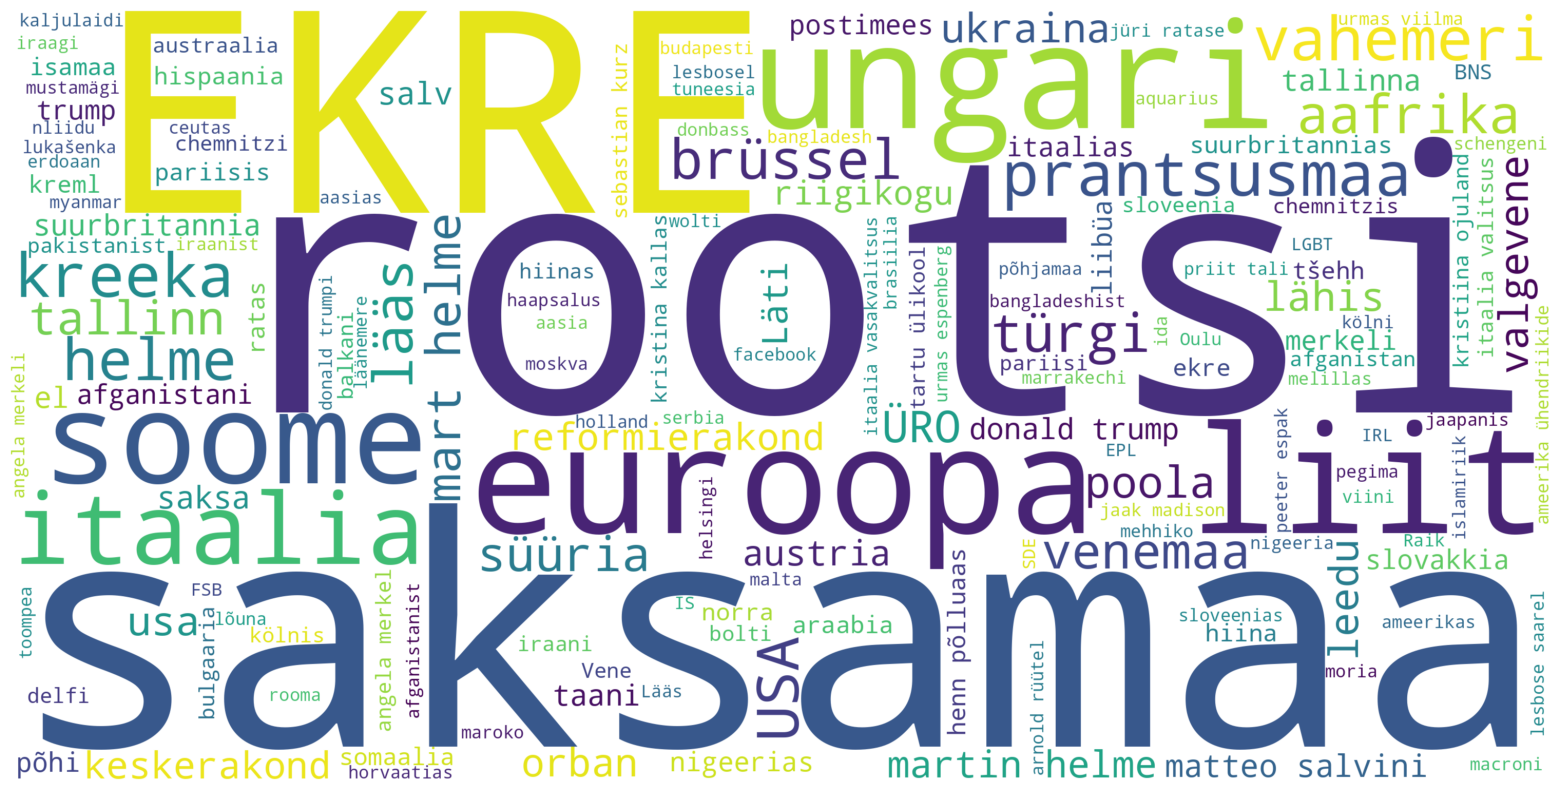

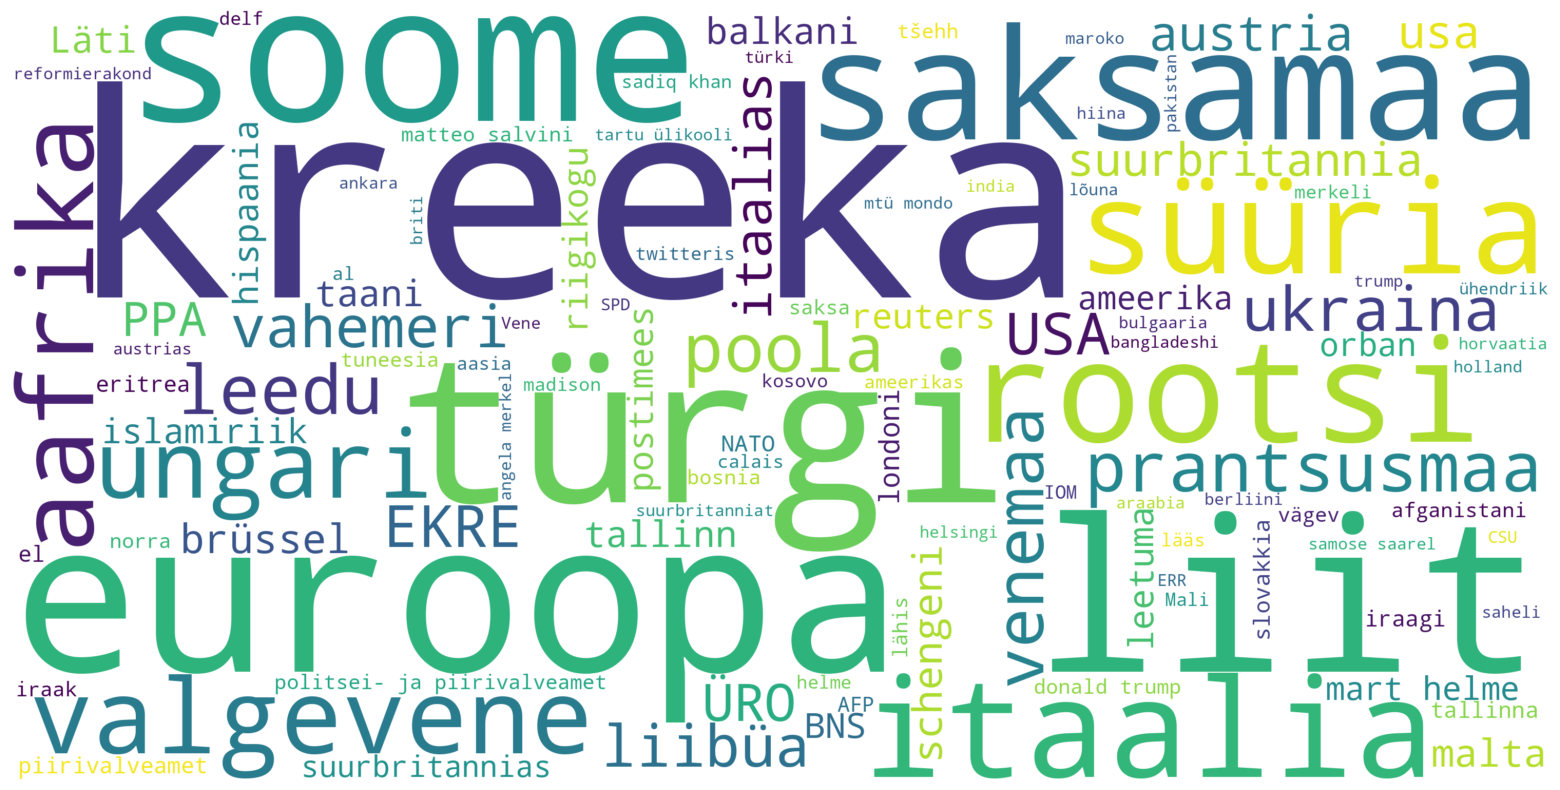

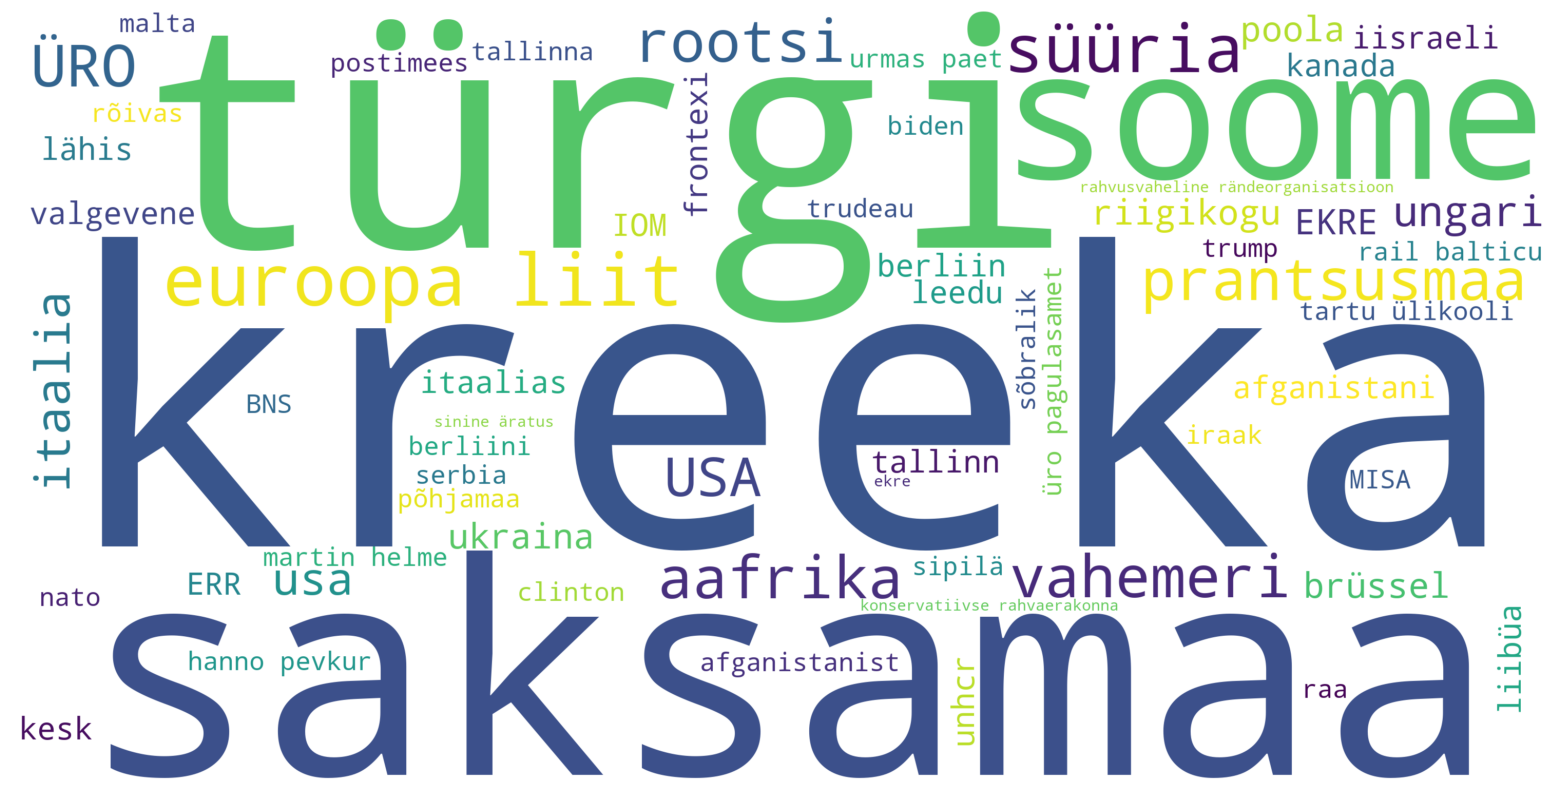

In [14]:
for ne_freq in [nef_freq_against, nef_freq_neutral, nef_freq_support]:
  # remove top 2
  ne_freq_sorted = dict(sorted(list(ne_freq.items()), key=lambda x: x[1], reverse=True)[2:])

  wordcloud = WordCloud(background_color="white", width=3000, height=1500, min_font_size=30, font_step=5).generate_from_frequencies(ne_freq_sorted)
  plt.figure(figsize=(20, 10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

##Noun Phrases

In [15]:
np_against = [" ".join(np) for sublist in list(data[data["stance"] == "against"]["noun_phrases"]) for np in sublist]
np_neutral = [" ".join(np) for sublist in list(data[data["stance"] == "neutral"]["noun_phrases"]) for np in sublist]
np_support = [" ".join(np) for sublist in list(data[data["stance"] == "supportive"]["noun_phrases"]) for np in sublist]

In [16]:
np_freq_against = FreqDist(np_against)
np_freq_neutral = FreqDist(np_neutral)
np_freq_support = FreqDist(np_support)

ad = sorted(dict(np_freq_against).items(), key=lambda x: x[1], reverse=True)
nd = sorted(dict(np_freq_neutral).items(), key=lambda x: x[1], reverse=True)
sd = sorted(dict(np_freq_support).items(), key=lambda x: x[1], reverse=True)
print("against                            neutral                            supportive")
for a, n, s in zip(ad, nd, sd):
  ak, av = a
  nk, nv = n
  sk, sv = s
  print(f"{av: <3} {ak: <30} {nv: <3} {nk: <30} {sv: <3} {sk: <30}")

against                            neutral                            supportive
7   Euroopa Liidu                  20  Euroopa Liidu                  6   Euroopa Liit                  
6   Euroopa Liit                   17  Euroopa Liitu                  4   Euroopa Liidu                 
6   Konservatiivne Rahvaerakond    12  2015. aastal                   4   Eesti Pagulasabi              
6   eesti keelt                    12  Euroopa Liit                   4   Euroopa Liidus                
5   sel nädalal                    7   2017. aastal                   4   elamisloa alusel              
5   Rootsi värk                    7   eelmisel nädalal               4   eesti keelt                   
5   Euroopa Komisjoni              6   eelmisel aastal                3   eesti keele                   
5   Helme sõnul                    5   Kreeka saartele                3   igal juhul                    
5   2015. aastast                  5   sel aastal                     3   sel n

##Adjectives

In [17]:
adj_against = [ne.lower() for sublist in list(data[data["stance"] == "against"]["adjectives"]) for ne in sublist]
adj_neutral = [ne.lower() for sublist in list(data[data["stance"] == "neutral"]["adjectives"]) for ne in sublist]
adj_support = [ne.lower() for sublist in list(data[data["stance"] == "supportive"]["adjectives"]) for ne in sublist]

adj_against_lemma = [Text(adj).tag_layer().lemma[0][0] for adj in adj_against]
adj_neutral_lemma = [Text(adj).tag_layer().lemma[0][0] for adj in adj_neutral]
adj_support_lemma = [Text(adj).tag_layer().lemma[0][0] for adj in adj_support]

In [18]:
freq_against = FreqDist(adj_against_lemma)
freq_neutral = FreqDist(adj_neutral_lemma)
freq_support = FreqDist(adj_support_lemma)

ad = sorted(dict(freq_against).items(), key=lambda x: x[1], reverse=True)
nd = sorted(dict(freq_neutral).items(), key=lambda x: x[1], reverse=True)
sd = sorted(dict(freq_support).items(), key=lambda x: x[1], reverse=True)
print("against                            neutral                            supportive")
for a, n, s in zip(ad, nd, sd):
  ak, av = a
  nk, nv = n
  sk, sv = s
  print(f"{av: <3} {ak: <30} {nv: <3} {nk: <30} {sv: <3} {sk: <30}")

against                            neutral                            supportive
59  suur                           63  uus                            21  uus                           
54  kogu                           61  suur                           19  suur                          
51  uus                            50  illegaalne                     15  rahvusvaheline                
36  illegaalne                     45  viimane                        15  kohalik                       
27  massiline                      40  saabunud                       12  võimalik                      
26  võõras                         39  ebaseaduslik                   11  kogu                          
24  valge                          37  võimalik                       10  suurem                        
22  poliitiline                    35  rahvusvaheline                 9   rassistlik                    
22  mustanahaline                  29  eelmine                        9   oluli

In [19]:
for freq in [freq_against, freq_neutral, freq_support]:
  wordcloud = WordCloud(background_color="white", width=3000, height=1500, min_font_size=30, font_step=5).generate_from_frequencies(freq)
  plt.figure(figsize=(20, 10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Quotes

In [20]:
a_qw = [w.lower() for sublist in list(data[data["stance"] == "against"]["quoted_words"]) for w in sublist]
n_qw = [w.lower() for sublist in list(data[data["stance"] == "neutral"]["quoted_words"]) for w in sublist]
s_qw = [w.lower() for sublist in list(data[data["stance"] == "supportive"]["quoted_words"]) for w in sublist]

In [21]:
fr_a_qw = FreqDist(a_qw).most_common()

fr_a_qw

[('euroopalike väärtuste', 3),
 ('paremäärmuslaste', 2),
 ('kahesajatajad', 2),
 ('jah', 2),
 ('keskpäevatund', 1),
 ('kolm idamaa tarka', 1),
 ('ullikesi', 1),
 ('õigele teele suunata', 1),
 ('õige rahvuskonservatiiv', 1),
 ('matid', 1),
 ('euroopalikes väärtustes', 1),
 ('suletud sadamate', 1),
 ('mary krossi aktsioone', 1),
 ('natsidega jne.', 1),
 ('vaidlus', 1),
 ('islam võib hävitada euroopa ühiskonna', 1),
 ('unustades', 1),
 ('poola maju', 1),
 ('õnnetutena', 1),
 ('ohvreid', 1),
 ('küll siis kalev jõuab koju…', 1),
 ('kahesajatajate', 1),
 ('putte i parken', 1),
 ('rassismisüü', 1),
 ('räigused', 1),
 ('päästma', 1),
 ('objektiivis', 1),
 ('üksikjuhtum', 1),
 ('maailm polnud pärast seda endine…', 1),
 ('meie eesti', 1),
 ('korrektselt, tasakaalukalt ja asjatundlikult', 1),
 ('solvata', 1),
 ('autonoomia', 1),
 ('tudengid', 1),
 ('aktuaalne kaamera', 1),
 ('vabama ja tugevama euroopa', 1),
 ('ohustab iga meie rahvast', 1),
 ('populistid', 1),
 ('paremäärmusliku-populistliku', 1

##Diminutives

In [22]:
data[data["diminutives_count"] != 0][["sentence", "stance", "diminutives"]]

,sentence,stance,diminutives
197,"Ilma rassismi ja inimeste nägemusi erinevate rasside rollidest lahkamata, on veidikene keeruline filmi arvustada, kuid seda tehes annaksin ära momentumi, mille peal lavastus elab.",neutral,[veidikene]
859,"Kui Ameerikas tuli võimule Trump, lubasid paljud Hollywoodi näitlejad samuti emigreeruda ja lumehelbekesed akendest välja viskuda, aga jäid siiski kohapeale ussitama – BLM-i suitsulõhnalised meeleavaldused lubasid ennast vabalt maha maandada, Portlandis loodi koguni oma anarhistlik “autonoomia”.Ei lähe ka Eestist ükski gei ega mustaga suhet sooviv vasakliberaal minema, sest neegreid tuleb siia pidevalt juurde ja homodel on samuti hea elu – kui Imre Sooäär Riigikogusse naases, pidas ta pika ennastnautiva kõne maha, hoolimata sellest, et spiiker teda ajapiirist kinni hoidma manitses ja koguni mikrofoni välja lülitas.",against,[lumehelbekesed]
1384,"Aga selleks ju migrandipaadid kehvakesed ongi, ja ilmselt lastakse need mõnda laeva märgates meelega vett täis.",against,[kehvakesed]
2080,"Hiljuti lõi “progressiivses maailmas” laineid Rootsi lumehelbeke, kes olevat justkui väljasaadetud afgaani elu päästnud – tegu oli paraku Rootsis juba tuntud kriminaaliga.",against,[lumehelbeke]
3032,"Rabakivi talu peremees Tiit Kaareste on Postimehele öelnud, et ukrainlastel pole Eestis muud teha kui töötada, seetõttu on nad motiveeritud ja võivad kuude kaupa kämpingus kambakesi elada – eestlasel on siin oma elu ja ta tahab ka koju jõuda.",neutral,[kambakesi]


##Superlative Form

In [23]:
def lemmatize_superlative(sl):
  sl = sl.split()
  lemma_sl = Text(sl[-1]).tag_layer().lemma[0][0]
  if len(sl) > 1:
    lemma_sl = "kõige " + lemma_sl
  return lemma_sl

neg_sl = [lemmatize_superlative(sl) for sublist in list(data[data["stance"] == "against"]["superlatives"]) for sl in sublist]
neu_sl = [lemmatize_superlative(sl) for sublist in list(data[data["stance"] == "neutral"]["superlatives"]) for sl in sublist]
pos_sl = [lemmatize_superlative(sl) for sublist in list(data[data["stance"] == "supportive"]["superlatives"]) for sl in sublist]

In [24]:
freq_neg_sl = FreqDist(neg_sl).most_common()
freq_neu_sl = FreqDist(neu_sl).most_common()
freq_pos_sl = FreqDist(pos_sl).most_common()

In [25]:
from itertools import zip_longest

for neg_sl, neu_sl, pos_sl in zip_longest(freq_neg_sl, freq_neu_sl, freq_pos_sl, fillvalue=""):
  print(f"{str(neg_sl): <35} {str(neu_sl): <35} {str(pos_sl): <35}")

('suurim', 9)                       ('suurim', 11)                      ('suurim', 4)                      
('parim', 4)                        ('kõrgeim', 5)                      ('kõige suurem', 2)                
('vähim', 3)                        ('enim', 3)                         ('enim', 1)                        
('kõige olulisem', 3)               ('tähtsaim', 2)                     ('kõige raskem', 1)                
('ehtsaim', 2)                      ('parim', 2)                        ('parim', 1)                       
('ülim', 2)                         ('kõige kõrgem', 1)                 ('olulisim', 1)                    
('kõige suurem', 1)                 ('veriseim', 1)                     ('kõige olulisem', 1)              
('kõige ebardlikum', 1)             ('kõige olulisem', 1)                                                  
('kõige hullem', 1)                 ('kõige rangem', 1)                                                    
('kõige külalislahkem', 1)  

In [26]:
data[(data["superlatives_count"] != 0) & (data["stance"] == "against")][["sentence", "superlatives"]]

,sentence,superlatives
39,"Neil on oht peale võõramaalase poolt pilastamist ka sildistatud ja süüdistatud saada.”Kogu sallivusleer – inimõiguste keskus, feministid, sallivuslased, LGBT ja teised multikultiühendused – läheks vähimagi kahtluseta neegri või araablase poolele.”",[vähimagi]
59,"Kas see pole mitte ehtsaim libauudise loomine, kui islamiäärmuslaste jälgi kuriteo kajastamisel ei tohi poliitkorrektselt viidata allikale, kust terroristid endale hingejõudu ammutavad? Kas reformikas ja eurokraat Meier tõesti ei märka, et just Eesti 200 ajabki näpuga järge selle Lääne ühiskonna “euroopalikes väärtustes” multikultuurse ühiskonna loomisel, perverssuste toetamisel, rahvusriikide lammutamisel ja nii edasi?",[ehtsaim]
316,"Imestama paneb, et Postimees üldse sellise soperdise avaldas – see on ehtsaim vihaõhutus, välismaalase sekkumine ühe iseseisva riigi sisepoliitikasse.",[ehtsaim]
507,"Eelnõu kohaselt viidaks rahvahääletus läbi 2019. aasta 3. märtsil koos Riigikogu valimistega, kus valija saaks sedelil vastata küsimusele: „Kas pooldate Eesti Vabariigi osalemist ÜRO globaalses rändepaktis?“EKRE aseesimehe Henn Põlluaasa sõnul on iseseisva demokraatliku riigi kodaniku üheks kõige olulisemaks õiguseks õigus otsustada, keda oma riiki lubada.„ÜRO rändepakt annab Eestile tulevikuks moraalsed ja poliitilisi suunised migratsiooni käsitlemiseks, riivates sellega meie riigi suveräänsust.”",[kõige olulisemaks]
608,"Et ma pean töötama, et saaks tehtud kõige olulisemad sammud: taastada siduvate rahvahääletuste algatamise võimalus ja peatada kindla käega suuremahuline, rahvusriiki ähvardav immigratsioon.",[kõige olulisemad]
644,"Saksamaa juhtiva erakonna CDU suvise kongressi järgsel pressikonverentsil tunnistas partei liider Angela Merkel ajakirjanike, et loomulikult on Saksamaa jaoks kõige olulisem probleem hetkel massilise sisserände problemaatika.",[kõige olulisem]
645,"Siseministeeriumil ei ole vähimatki ainu, kui palju on Eesti illegaalseid või renditöötajaid, kas neid on kümme või kakskümmend tuhat.",[vähimatki]
646,"Ta teab, et selles hoidmises võib ta tugineda 21. sajandi alguse kogemusele, mil globalistliku ideoloogia pealetung oli laineharjal ja eesti keel suurimas ohus.",[suurimas]
847,"Sellised küsimused summutati ja nende esitajad sildistati – meedias ei järgnenud vähimatki asjalikku ja igakülgset arutelu sellest, mida võiks pagulaskriis Eestile kaasa tuua.",[vähimatki]
889,"Hiljuti avaldas Postimees suure loo terrorismist, mis hoolimata tõdemusest, et kõige suuremat peavalu valmistavad džihadistid, jäi lahjaks, sest polnud islamiterrorismi esiletõstmist.",[kõige suuremat]


In [27]:
data[data["superlatives_count"] != 0]["stance"].value_counts()

stance
neutral       42
against       34
supportive    11
Name: count, dtype: int64

## Conditional Form

In [28]:
data[data["conditionals_count"] != 0][["sentence", "stance", "conditionals"]]

,sentence,stance,conditionals
1,Massiimmigratsioon oleks Euroopale hukatuslik ja see ei lahendaks maailmas mitte midagi.,against,"[oleks, lahendaks]"
2,"Lõppjäreldus on, et Eesti rahvaarv kasvab võõraste sisserändest, mis on rahvusriigile ohtlik.“Iga-aastase paarituhandelise sisserände ülekaalu puhul hakkaks eestlaste suhtarv rahvastikus aegamööda vähenema.”",against,[hakkaks]
5,"”“Läbimõeldud, kogukonna juhitud ja täielikult ressurssidega kaetud tegevuskava, mis tegeleb mustanahaliste konkreetsete väljakutsetega, peab olema esmatähtis,” kirjutas Cullors ja lisas, et “me tahame oma häälte eest midagi.”BLM-i asutaja väitis koguni, et Biden ja Harris võitsid 2020. aasta presidendivalimised tänu mustanahalistele – seda hoolimata sellest, et valimistulemused pole veel kinnitatud, samuti hoolimata asjaolust, et president Donald Trump pälvis tegelikult suure osa mustanahaliste valijate toetuse, saades mustanahaliste häältest varasema 13 protsendi asemel 18 protsenti.„Ilma mustanahaliste suure toetuseta oleks valimistel hoopis teised tulemused.",neutral,[oleks]
7,"Seotud lood:Siseministeeriumi ametnik: “Me töötamegi selle nimel, et sisseränne suureneks.”Naist põlema panna tahtnud Süüria pagulane jääb esialgu veel vahi allaUrmas Espenberg: meid valmistatakse ette immigrantide senisest suuremaks vastuvõtuksEestisse asus mullu elama üle 8000 välismaalaseFOTO: AFP/Scanpix – (illustratiivne) naisepeks šariaadikohtus",supportive,[suureneks]
13,"Uued Uudised vahendavad mõningaid sõnumeid meediaagentuurilt BNS, mis lubavad oletada, et rändekriis jätkub ning Macron, Merkel ja Juncker tahavad sellel vaid rohkem silma peal hoida, ÜRO ja igasugused pagulas- ning inimõigusorganisatsioonid aga laseksid põgenikel igasuguste piiranguteta ringi tormata.“Euroopa Liit kaalub blokis asüüli tahtvate migrantide menetlemiseks maaleminekuplatvormide loomist, selgus teisipäeval uudisteagentuuri AFP kätte jõudnud eelseisva Euroopa Ülemkogu otsuse visandist.”",against,[laseksid]
...,...,...,...
3240,"Ja kuigi töökohti sünnib kiiremas tempos kui inimesi tööturule lisandub, oleks ennatlik hakata sisserändajaid massiliselt riiki kutsuma.",neutral,[oleks]
3243,Postsovjetlikust Ukrainast võõrtööliste sisselubamine koroonaviirusesse haigestumise tipphetkel oleks lihtsalt hukatuslik.,against,[oleks]
3246,"Berliini siseminister Andreas Geisel ütles kolmapäeval, et Saksamaa pealinnas on vihkamine sakslaste vastu tõusuteel – peavarju saanud agressiivsed sisserändajad vihkavad enda vastuvõtjaid.“See on ületanud normaalsuse piirid, kuid muutub üha tavalisemaks – sellest vaikida oleks vale, ” vahendab Local Geiseli ajalehele Tagesspiegel öeldut.“Mida me saame sellega seoses teha?”",against,[oleks]
3253,"Võib tunduda, et erakonna soov piirata kontrolli alt väljunud odava tööjõu sisserännet slaavi riikidest peaks olema venelastele vastuvõetamatu, aga tegelikult on lugu vastupidine — just väikese palga eest töötavad võõrsilt tulnud venelased, ukrainlased ja valgevenelased löövad alla keskmise palga, võtavad ära siin elavate inimeste töökohad ning kisuvad sellega alla meie elatustaset, sundides kohalikke mujale vaatama.",against,[peaks]


In [29]:
neg_cd = [cd for sublist in list(data[data["stance"] == "against"]["conditionals"]) for cd in sublist]
neu_cd = [cd for sublist in list(data[data["stance"] == "neutral"]["conditionals"]) for cd in sublist]
pos_cd = [cd for sublist in list(data[data["stance"] == "supportive"]["conditionals"]) for cd in sublist]

In [30]:
freq_neg_cd = FreqDist(neg_cd).most_common()
freq_neu_cd = FreqDist(neu_cd).most_common()
freq_pos_cd = FreqDist(pos_cd).most_common()

In [31]:
from itertools import zip_longest

for neg_cd, neu_cd, pos_cd in zip_longest(freq_neg_cd, freq_neu_cd, freq_pos_cd, fillvalue=""):
  print(f"{str(neg_cd): <35} {str(neu_cd): <35} {str(pos_cd): <35}")

('oleks', 37)                       ('oleks', 27)                       ('peaks', 16)                      
('peaks', 26)                       ('peaks', 19)                       ('oleks', 12)                      
('tuleks', 15)                      ('saaks', 8)                        ('tuleks', 9)                      
('peaksid', 9)                      ('tuleks', 7)                       ('saaks', 6)                       
('poleks', 9)                       ('peaksid', 7)                      ('oleksid', 5)                     
('tohiks', 8)                       ('saaksid', 6)                      ('saaksid', 5)                     
('võiks', 7)                        ('võiks', 6)                        ('võiks', 3)                       
('saaks', 6)                        ('oleksid', 5)                      ('peaksime', 2)                    
('annaks', 4)                       ('läheks', 4)                       ('tohiks', 2)                      
('oleksid', 4)              

##Translative Case

In [32]:
data[data["translatives_count"] != 0][["sentence", "stance", "translatives"]]

,sentence,stance,translatives
7,"Seotud lood:Siseministeeriumi ametnik: “Me töötamegi selle nimel, et sisseränne suureneks.”Naist põlema panna tahtnud Süüria pagulane jääb esialgu veel vahi allaUrmas Espenberg: meid valmistatakse ette immigrantide senisest suuremaks vastuvõtuksEestisse asus mullu elama üle 8000 välismaalaseFOTO: AFP/Scanpix – (illustratiivne) naisepeks šariaadikohtus",supportive,[suuremaks]
8,Euroopa Parlamendis küpseb kava kehtestada liikmesriikidele kohustuslikud kvoodid pagulaste vastuvõtmiseks.“Madisoni sõnul ei tohi lubada Eesti valitsusel Brüsseli jõupoliitikaga kaasa minna.”,neutral,[vastuvõtmiseks]
9,"“Sisseränne ida suunalt on muutunud massiliseks ja kontrollimatuks ning sellepärast tuleb see probleem võtta teravdatud tähelepanu alla.”Sisserände töörühm alustas tegevust 2017. aasta suvel, kui selle eesmärgiks seati valdkonna huvitatud osapooled kokku tuua ning valitsusele sisserände osas nõu anda.",neutral,"[massiliseks, kontrollimatuks, eesmärgiks]"
12,"Soome sotsiaalmeedias on rassism ja solvangud muutunud igapäevaseks, kuid seesugune kõnepruuk on hakanud ilmuma ka poliitilisse diskussiooni, hoiatas Euroopa Nõukogu teisipäeval.“Avalikus diskursuses tõstab pead rassistlik ja sallimatu vaenukõne; peamisteks sihtmärkideks on asüülitatolejad ja moslemid,” öeldakse Euroopa Nõukogu rassismi- ja sallimatuse vastase komisjoni (ECRI) raportis.",neutral,"[igapäevaseks, peamisteks, sihtmärkideks]"
13,"Uued Uudised vahendavad mõningaid sõnumeid meediaagentuurilt BNS, mis lubavad oletada, et rändekriis jätkub ning Macron, Merkel ja Juncker tahavad sellel vaid rohkem silma peal hoida, ÜRO ja igasugused pagulas- ning inimõigusorganisatsioonid aga laseksid põgenikel igasuguste piiranguteta ringi tormata.“Euroopa Liit kaalub blokis asüüli tahtvate migrantide menetlemiseks maaleminekuplatvormide loomist, selgus teisipäeval uudisteagentuuri AFP kätte jõudnud eelseisva Euroopa Ülemkogu otsuse visandist.”",against,[menetlemiseks]
...,...,...,...
3245,"Siseministeerium on hakanud tegema esimesi samme pagulaste vastuvõtuks, näiteks korraldanud hanke 65 pagulase koolitamiseks.",supportive,"[vastuvõtuks, näiteks, koolitamiseks]"
3246,"Berliini siseminister Andreas Geisel ütles kolmapäeval, et Saksamaa pealinnas on vihkamine sakslaste vastu tõusuteel – peavarju saanud agressiivsed sisserändajad vihkavad enda vastuvõtjaid.“See on ületanud normaalsuse piirid, kuid muutub üha tavalisemaks – sellest vaikida oleks vale, ” vahendab Local Geiseli ajalehele Tagesspiegel öeldut.“Mida me saame sellega seoses teha?”",against,[tavalisemaks]
3248,"Uuring näitas, et Trumpi pagulasi ja terroriohtu puudutavaid otsuseid peab õigeks pool või üle poole Eesti elanikest.“Pagulaskriis ning islamiterror on Eestis pälvinud väga suurt tähelepanu ning negatiivseid reaktsioone, mistõttu on mõistetav, et just terroriohu vähendamist taotlevad otsused saavad kõige positiivsema hinnangu,” ütles Ühiskonnauuringute instituudi analüütik Peeter Espak.",against,[õigeks]
3257,"Hanso sõnul tuleb igale pagulasele, kes valib oma sihtriigiks Eesti, tagada kiire keeleõpe, aidata leida sobiv töökoht ning võimaldada elada turvaliselt Eestis niikaua, kuni tal on võimalik koju tagasi pöörduda.",supportive,[sihtriigiks]


In [33]:
tr_against = [tr for sublist in list(data[data["stance"] == "against"]["translatives"]) for tr in sublist]
tr_neutral = [tr for sublist in list(data[data["stance"] == "neutral"]["translatives"]) for tr in sublist]
tr_support = [tr for sublist in list(data[data["stance"] == "supportive"]["translatives"]) for tr in sublist]

tr_fr_against = FreqDist(tr_against)
tr_fr_neutral = FreqDist(tr_neutral)
tr_fr_support = FreqDist(tr_support)

from itertools import zip_longest

for neg_tr, neu_tr, pos_tr in zip_longest(tr_fr_against.most_common(), tr_fr_neutral.most_common(), tr_fr_support.most_common(), fillvalue=""):
  print(f"{str(neg_tr): <35} {str(neu_tr): <35} {str(pos_tr): <35}")

('näiteks', 26)                     ('näiteks', 22)                     ('näiteks', 14)                    
('lisaks', 18)                      ('lisaks', 22)                      ('lisaks', 9)                      
('selleks', 15)                     ('selleks', 16)                     ('selleks', 6)                     
('põhjuseks', 7)                    ('probleemiks', 6)                  ('suuremaks', 3)                   
('eesmärgiks', 6)                   ('õppimiseks', 6)                   ('tegelemiseks', 3)                
('selgeks', 5)                      ('eesmärgiks', 5)                   ('õppimiseks', 3)                  
('ohvriks', 4)                      ('üheks', 5)                        ('eesmärgiks', 3)                  
('üheks', 4)                        ('aastaks', 4)                      ('saamiseks', 2)                   
('tulemuseks', 4)                   ('lõpuks', 4)                       ('nüüdseks', 2)                    
('aastaks', 4)              

##Indirect Speech

In [34]:
data[data["indirects_count"] != 0][["sentence", "stance", "indirects"]]

,sentence,stance,indirects
16,"Eesti Päevaleht kirjutas rahvusriikide vaenaja George Sorosi arvamusest, et rahvuslus olevat suurimaks ohuks avatud ühiskonnale (mis on avatud näiteks islamistidele).Prantsuse president Emmanuel Macron võrdles aasta eest Euroopas pead tõstvaid “natsionalistlikke” ja migratsioonivastaseid meeleolusid pidalitõvega ning kordas seda juttu sel nädala taas üle.",supportive,[olevat]
61,"Raamatus jutustatakse sotside osalusest korruptsioonis ja petusüsteemides, homoühingute toetamisest maksumaksja rahaga, sallivusrünnakutest ühiskonna ja eriti EKRE vastu, SDE vastandumisest rahvusriiklusele ja põhiseaduslikule korrale, nende rollist kooseluseaduse läbisurumises ja vihakõnede kriminaliseerimise korraldamises, sotside toetusest massiimmigratsioonile, rändepakti läbisurumisest ja paljust muust.“Paistab olevat põhjalik töö ja huvitav lugemine.”",against,[olevat]
82,"Kuigi sageli väidetakse, et see sõda pidavat takistama migratsiooni ja inimkaubandust, ajab konflikt pigem massid liikuma.",neutral,[pidavat]
205,"Peavoolumeedia aga kubiseb odavatest paskvillidest, kus keegi eestlastest väidab, et keegi välismaalastest olevat jällegi rassistlike rünnakute ohvriks langenud.",against,[olevat]
215,"Kruuse vihjab sellele, et ukrainlaste siialubamine ei kujutavat terviseriski, ta viitab Soomele ja lõpetab sellega, et puuduvat igasugune adekvaatne põhjus võõrtööjõudu mitte riiki lubada.",supportive,[kujutavat]
236,Samuti olevat Trump nimetanud latiinosid ja mustanahalisi tema poolt hääletamiseks liiga rumalateks.,against,[olevat]
382,"Ajavahemikul 1. jaanuarist 14. juunini olevat Leedusse imbunud 3,5 korda rohkem illegaalseid immigrante kui kogu 2020. aasta kestel.",neutral,[olevat]
549,"Samas aga tunnistab ta, et probleemiks olevat politseivormid, mille juurde tuleks tema hinnangul sobitada moslemisallid – sellist võimalust üks siseministeeriumi osakond juba uurivat.“Politsei jaoks oleks oluline, et eri kultuuridest pärit inimesed saaksid üksteisest paremini aru, sest see aitaks luua usaldusväärse suhte politsei ja avalikkuse vahel,” räägib Ohisalo.",neutral,"[olevat, uurivat]"
621,"President Kaljulaid, peaminister Ratas koos oma krimierakonnaga, kogu härrassotside kamp koos viimati sel teemal sõna võtnud välisminister Mikseriga, Reformierakond koos Kaja Kallasega, globalistlik “kahesajatajate” projektipartei – kõik nad on viimasel ajal kukkunud aktiivselt ladistama sellest, et Eesti polevat migratsiooni sihtriik, meil polevat mingit massiimmigratsiooni ega ka tulevat seda, ning rändepakt olevat vaid õnnistus.",against,"[polevat, polevat, tulevat, olevat]"
745,"Vasakliberaalses ühiskonnas aga on loodud olukord, kus valgete vastu suunatud põhjendamatu ja pahatahtlik viha polegi rassism – valged olevatki pahad.",against,[olevatki]


In [35]:
s = 0
for w, c in FreqDist([sl for sublist in list(data["indirects"]) for sl in sublist]).most_common():
  s += c
  print(w, c)
print(s)

olevat 24
polevat 4
pidavat 2
kujutavat 2
tulevat 2
andvat 2
uurivat 1
olevatki 1
käivat 1
teadvat 1
rõõmustavat 1
tahtvat 1
jätkuvat 1
võtvat 1
kahtlustatavat 1
võivat 1
panevat 1
tegevat 1
48
